In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.stats import linregress
from statsmodels.tsa.arima.model import ARIMA
from pyts.decomposition import SingularSpectrumAnalysis
from pmdarima.arima import auto_arima
import warnings
import itertools
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram, find_peaks
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox, normaltest
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import pywt
from sklearn.decomposition import PCA
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.utils.extmath import randomized_svd
from PyEMD import EMD
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
from pykalman import KalmanFilter
import torch
import torch.nn as nn
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from astropy.timeseries import LombScargle
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import datetime
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import correlate
from scipy.fft import fft, fftfreq

# –ü–æ–¥–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
time_series = pd.read_excel("bitcoin.xlsx")

In [3]:
time_series = time_series.sort_values('–î–∞—Ç–∞', ignore_index=True)
time_series

–î–∞—Ç–∞       –ó–Ω–∞—á–µ–Ω–∏–µ
0    2015-05-06     229.780000
1    2015-05-07     237.330000
2    2015-05-08     243.860000
3    2015-05-09     241.830000
4    2015-05-10     240.300000
...         ...            ...
3607 2025-05-30  104694.787188
3608 2025-05-31  103803.121799
3609 2025-06-01  105233.374133
3610 2025-06-02  104839.027304
3611 2025-06-03  105927.194148

[3612 rows x 2 columns]

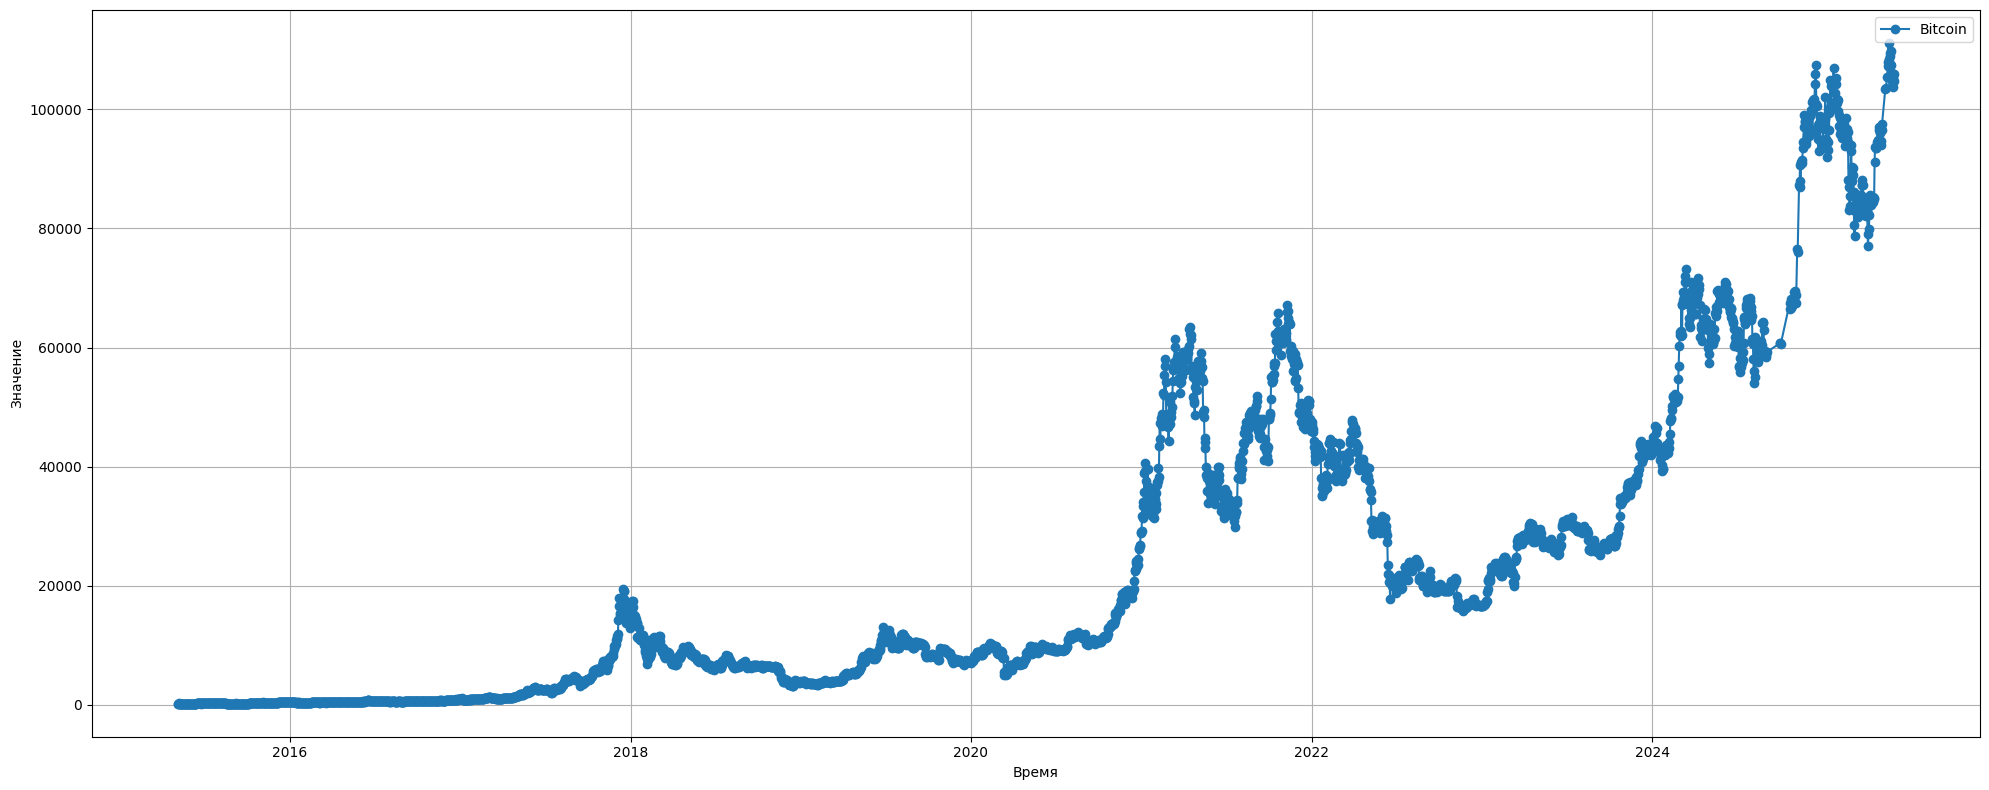

In [4]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(20, 8))
plt.plot(time_series['–î–∞—Ç–∞'],time_series['–ó–Ω–∞—á–µ–Ω–∏–µ'], marker='o', label="Bitcoin")
plt.xlabel("–í—Ä–µ–º—è")
plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
time_series = time_series["–ó–Ω–∞—á–µ–Ω–∏–µ"].values
baseval = adfuller(time_series)[1]
baseval

0.9636111255934985

p-value > 0.05 ‚Üí –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É ‚Üí —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π.
–¢–æ –µ—Å—Ç—å –µ—Å—Ç—å —Ç—Ä–µ–Ω–¥ –∏/–∏–ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å/—Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç—å.


In [6]:
stat, p_value, lags, crit = kpss(time_series, regression='c')
print(f'KPSS Statistic: {stat}, p-value: {p_value}')

KPSS Statistic: 6.306225053313192, p-value: 0.01


p-value < 0.05 ‚Üí –æ—Ç–≤–µ—Ä–≥–∞–µ–º –≥–∏–ø–æ—Ç–µ–∑—É —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏.
–≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç: —Ä—è–¥ –∏–º–µ–µ—Ç —Ç—Ä–µ–Ω–¥ –∏/–∏–ª–∏ —Å–µ–∑–æ–Ω–Ω—É—é —Å–æ—Å—Ç–∞–≤–ª—è—é—â—É—é.

## –î–µ–ª–∞–µ–º EMD –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—é

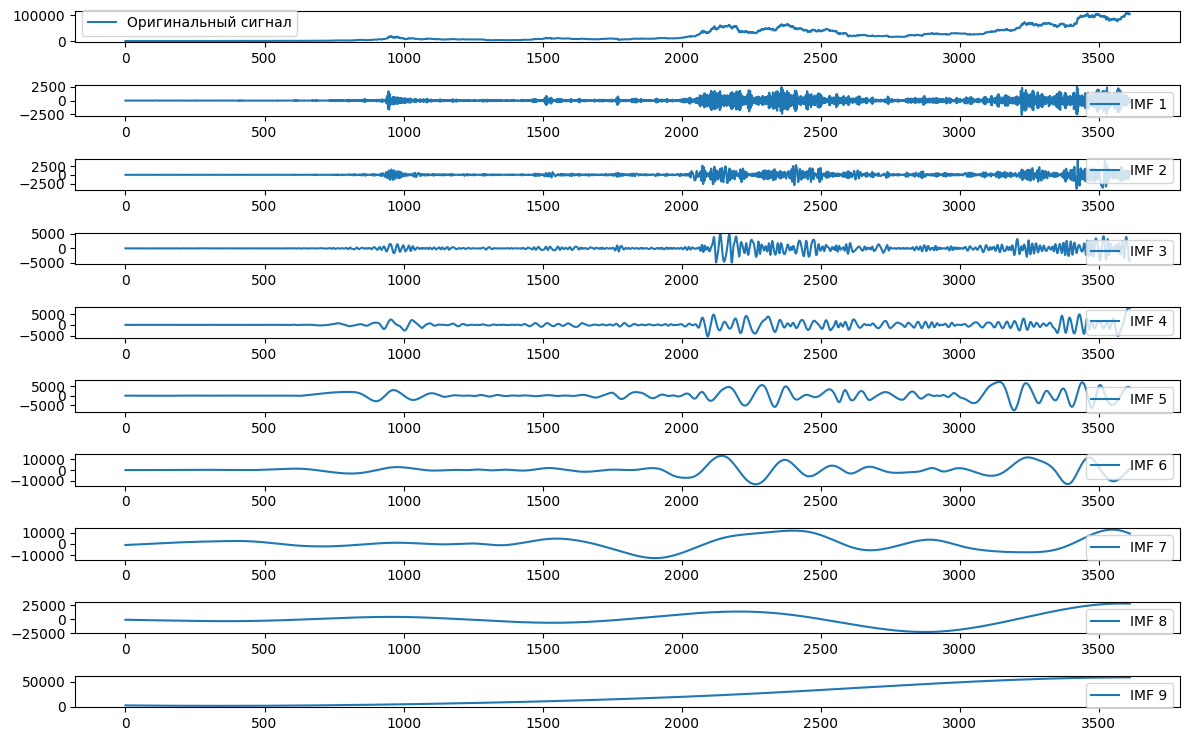

In [7]:
emd = EMD()
imfs = emd(time_series)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 8))
plt.subplot(len(imfs)+2, 1, 1)
plt.plot(time_series, label='–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª')
plt.legend()

# –í—Å–µ IMFs
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs)+2, 1, i+2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend()

plt.tight_layout()  # –ß—Ç–æ–±—ã –≥—Ä–∞—Ñ–∏–∫–∏ –Ω–µ –Ω–∞–ª–µ–∑–∞–ª–∏ –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.savefig("emd_decomposition.png", dpi=300)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ –≤ –Ω–æ—É—Ç–±—É–∫–µ
plt.show()

üìä –ß—Ç–æ –≤–∏–¥–Ω–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ:
- IMF1‚ÄìIMF3: –≤—ã—Å–æ–∫–∞—è —á–∞—Å—Ç–æ—Ç–∞, —à—É–º/–º–µ–ª–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è (–ø–æ—Ö–æ–∂–∏ –Ω–∞ –∫–∞—Ä–¥–∏–æ–≥—Ä–∞–º–º—É) ‚Äî —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –≤—ã—Å–æ–∫–æ—á–∞—Å—Ç–æ—Ç–Ω—ã–π —à—É–º.
- **IMF4‚ÄìIMF7: —è–≤–Ω–æ –±–æ–ª–µ–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≤–æ–ª–Ω—ã ‚Üí —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –≤–æ–∑–º–æ–∂–Ω–æ, –æ—Ç—Ä–∞–∂–∞—é—Ç —Ä—ã–Ω–æ—á–Ω—ã–µ —Ñ–∞–∑—ã.**
- IMF8‚ÄìIMF9: –º–µ–¥–ª–µ–Ω–Ω—ã–µ –≤–æ–ª–Ω—ã, –æ—Å–æ–±–µ–Ω–Ω–æ IMF9 ‚Äî –ø–æ—Ö–æ–∂ –Ω–∞ –≥–ª–æ–±–∞–ª—å–Ω—ã–π —Ç—Ä–µ–Ω–¥ (–ø–ª–∞–≤–Ω—ã–π —Ä–æ—Å—Ç –ø–æ –æ—Å–∏ –≤—Ä–µ–º–µ–Ω–∏).

## –ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å IMF4‚ÄìIMF7

In [8]:
possible_cycle = np.sum(imfs[4:8], axis=0)
possible_cycle = pd.Series(possible_cycle)

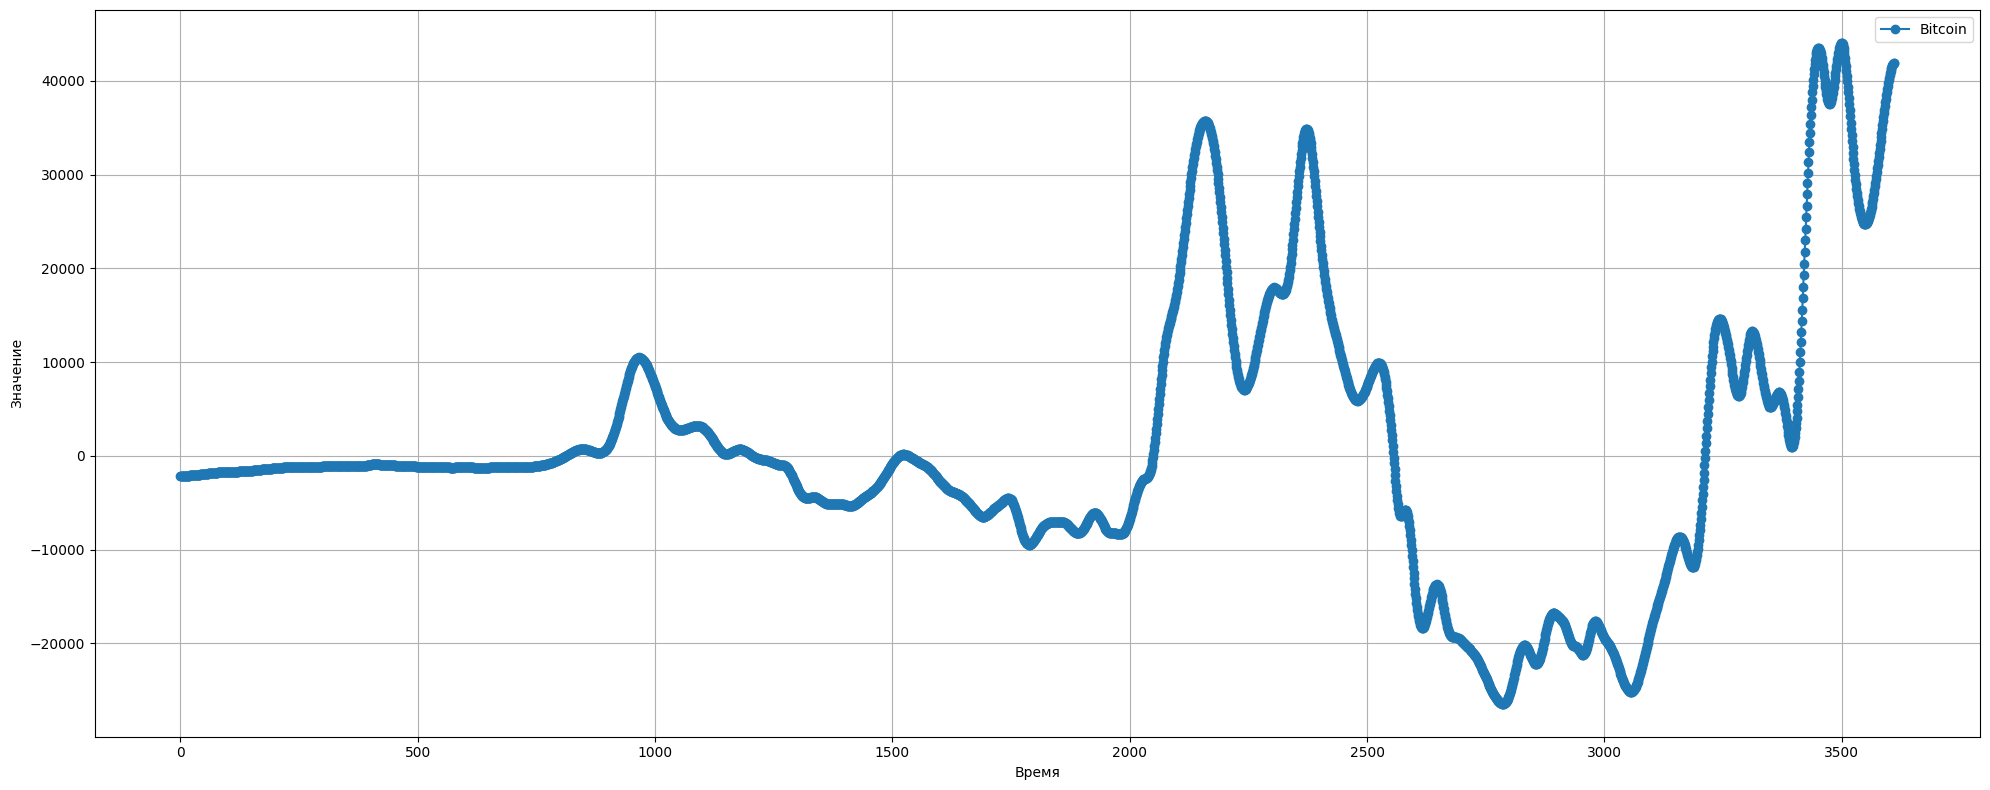

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(possible_cycle, marker='o', label="Bitcoin")
plt.xlabel("–í—Ä–µ–º—è")
plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏
adf_p = adfuller(possible_cycle)[1]
kpss_p = kpss(possible_cycle, regression='c')[1]


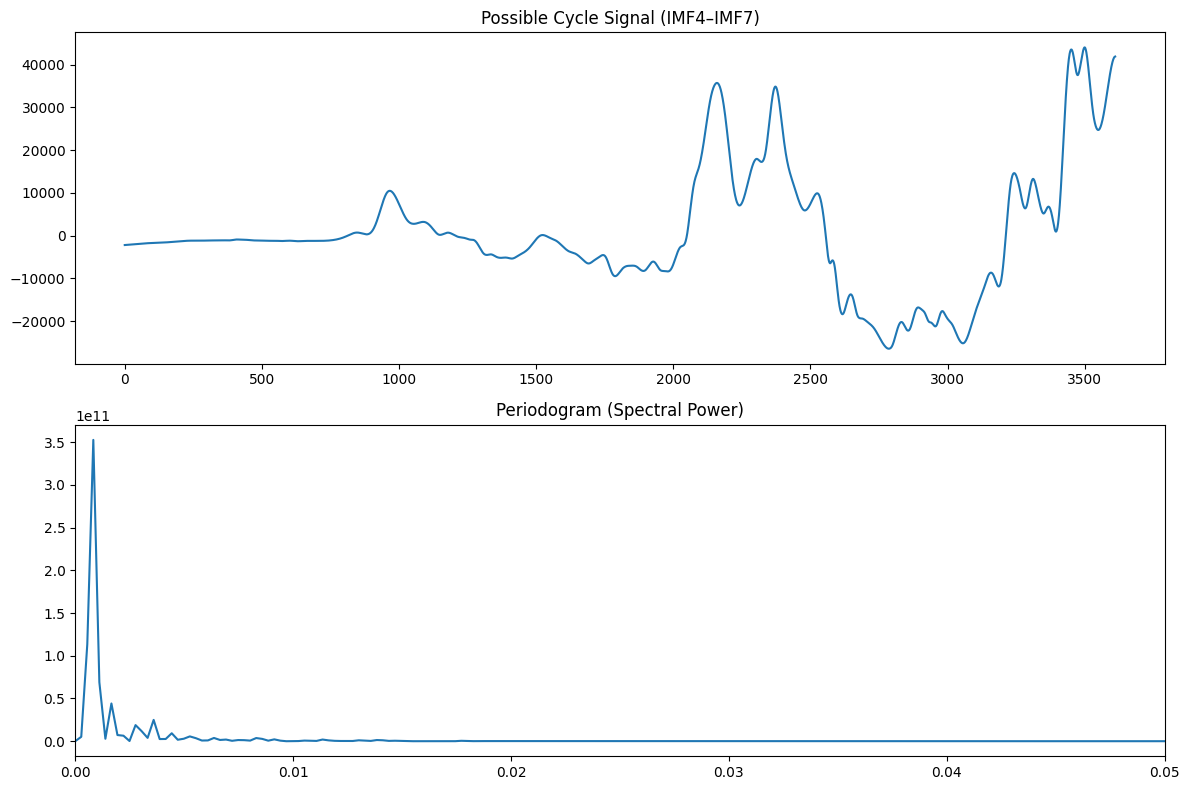

(None, 0.20340718642874134, 0.08521524855280477)

In [11]:
# –°–ø–µ–∫—Ç—Ä–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑
freqs, power = periodogram(possible_cycle)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å–∏–≥–Ω–∞–ª–∞ –∏ —Å–ø–µ–∫—Ç—Ä–∞
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(possible_cycle)
axs[0].set_title("Possible Cycle Signal (IMF4‚ÄìIMF7)")

axs[1].plot(freqs, power)
axs[1].set_title("Periodogram (Spectral Power)")
axs[1].set_xlim(0, 0.05)

plt.tight_layout()
plt.show(), adf_p, kpss_p

###  IMF4‚ÄìIMF7 –∫–∞–∫ —Ü–∏–∫–ª—ã –±–µ–∑ —Ç—Ä–µ–Ω–¥–∞ ‚Äî –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è
- –æ–Ω–∏ –Ω–µ –∏–º–µ—é—Ç —É—Å—Ç–æ–π—á–∏–≤–æ–≥–æ –Ω–∞–∫–ª–æ–Ω–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞,
- —Å—É–º–º–∞ –≤—ã–≥–ª—è–¥–∏—Ç –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–π,
- —Ç—Ä–µ–Ω–¥ —è–≤–Ω–æ –æ—Å—Ç–∞–ª—Å—è –≤ IMF8‚ÄìIMF9 (—á—Ç–æ –ª–æ–≥–∏—á–Ω–æ, –ø–æ—Å–∫–æ–ª—å–∫—É EMD –ø–æ —Å—É—Ç–∏ "–≤—ã—Ç–∞–ª–∫–∏–≤–∞–µ—Ç" —Ç—Ä–µ–Ω–¥ –≤ —Ö–≤–æ—Å—Ç).
- üìå –≠—Ç–æ –¥–µ–ª–∞–µ—Ç IMF4‚ÄìIMF7 –æ—Ç–ª–∏—á–Ω—ã–º–∏ –∫–∞–Ω–¥–∏–¥–∞—Ç–∞–º–∏ –Ω–∞ —Ü–∏–∫–ª–∏—á–Ω—ã–µ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ (–Ω–æ, –≤–æ–∑–º–æ–∂–Ω–æ, –¥–ª–∏–Ω–Ω—ã–µ –∏ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω—ã–µ –ø–æ —á–∞—Å—Ç–æ—Ç–µ ‚Äî —Ç–æ –µ—Å—Ç—å –Ω–µ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å).

–°–ø–µ–∫—Ç—Ä–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑:
- –ù–∞ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º–µ –µ—Å—Ç—å –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã–π –ø–∏–∫ –≤ –Ω–∏–∑–∫–∏—Ö —á–∞—Å—Ç–æ—Ç–∞—Ö (–±–ª–∏–∑–∫–æ –∫ 0), —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –º–µ–¥–ª–µ–Ω–Ω–æ –º–µ–Ω—è—é—â–µ–π—Å—è —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç–∏ ‚Äî –Ω–µ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏, –∞ –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π.

- ADF p-value: 0.203 ‚Äî –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–∞–ª–∏—á–∏–∏ –µ–¥–∏–Ω–∏—á–Ω–æ–≥–æ –∫–æ—Ä–Ω—è ‚Üí –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.
- KPSS p-value: 0.085 ‚Äî –Ω–∞ –≥—Ä–∞–Ω–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (–æ–±—ã—á–Ω–æ –ø–æ—Ä–æ–≥ 0.05) ‚Üí  —á—Ç–æ –æ–±—ã—á–Ω–æ –¥–∞–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥–æ–∑—Ä–µ–≤–∞—Ç—å –º–µ–¥–ª–µ–Ω–Ω—É—é –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—É(—Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç–∏) –∏–ª–∏ —Ç—Ä–µ–Ω–¥ (–Ω–æ –µ–≥–æ –Ω–∞–ª–∏—á–∏–µ –∏—Å–∫–ª—é—á–∏–ª–∏).

##  –°–¥–µ–ª–∞–µ–º –í–µ–π–≤–ª–µ—Ç-–¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—é

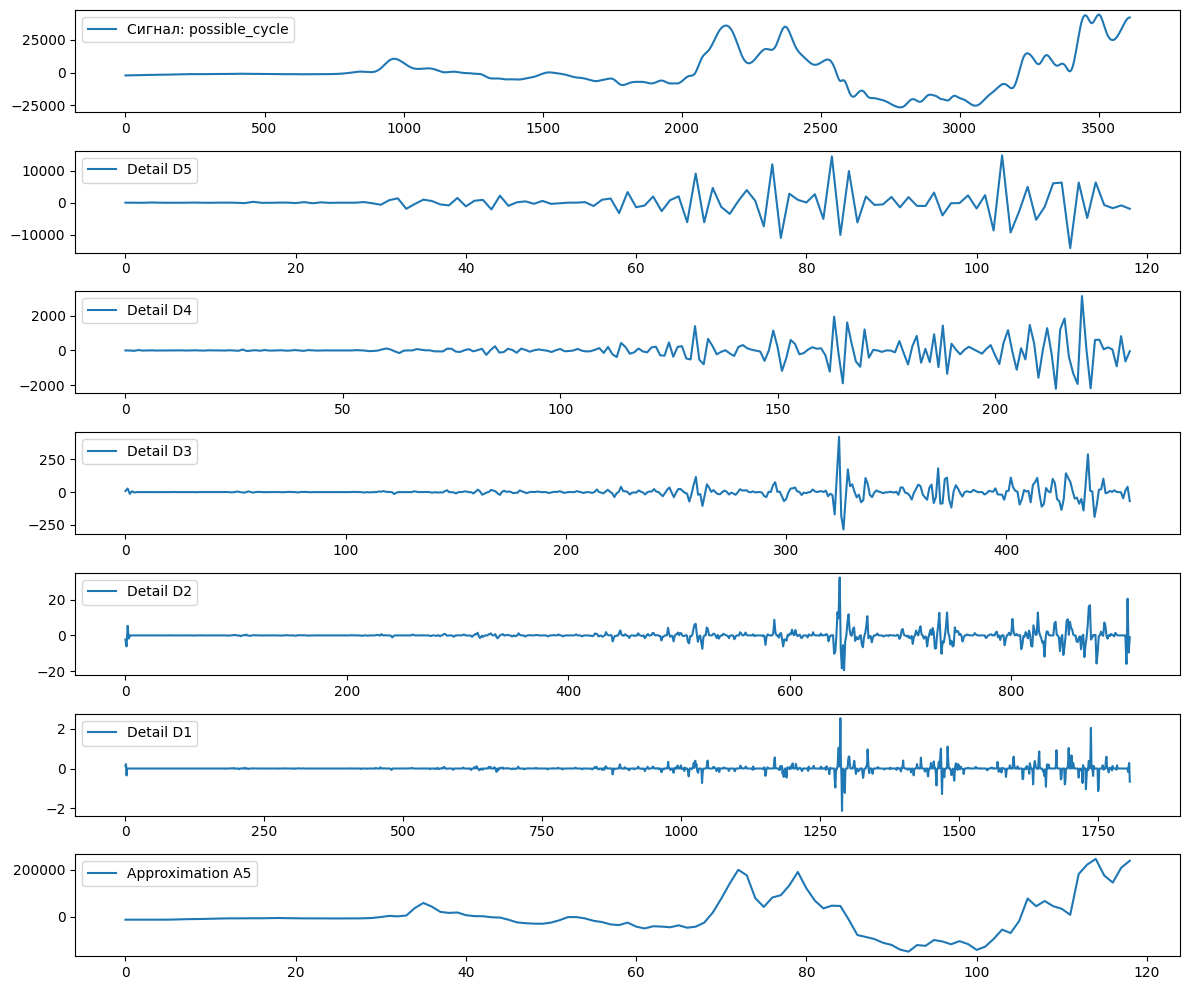

In [12]:
# –í–µ–π–≤–ª–µ—Ç-–¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è
wavelet = 'db4'
level = 5

coeffs = pywt.wavedec(possible_cycle, wavelet=wavelet, level=level)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 10))
plt.subplot(level + 2, 1, 1)
plt.plot(possible_cycle, label="–°–∏–≥–Ω–∞–ª: possible_cycle")
plt.legend()

for i, coeff in enumerate(coeffs[1:], 1):  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—é
    plt.subplot(level + 2, 1, i + 1)
    plt.plot(coeff, label=f'Detail D{level - i + 1}')
    plt.legend()

plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs[0], label=f'Approximation A{level}')
plt.legend()

plt.savefig("wavelet.png", dpi=300)

plt.tight_layout()
plt.show()

 –í—ã–≤–æ–¥:
–§–æ—Ä–º–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è ‚Üí —Ü–∏–∫–ª—ã –µ—Å—Ç—å, –ø—Ä–æ—Å—Ç–æ –æ–Ω–∏ –≤–ª–æ–∂–µ–Ω—ã –≤ –¥—Ä—É–≥ –¥—Ä—É–≥–∞.
–ó–Ω–∞—á–∏—Ç, –≤–æ–∑–º–æ–∂–Ω—ã–µ —Ü–∏–∫–ª—ã –Ω–µ –µ–¥–∏–Ω–∏—á–Ω—ã, –∞ –∏–º–µ—é—Ç —Ñ—Ä–∞–∫—Ç–∞–ª—å–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É.
–≠—Ç–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —Ç–∏–ø–∏—á–Ω–æ –¥–ª—è —Å–ª–æ–∂–Ω—ã—Ö —Å–∏—Å—Ç–µ–º, –æ—Å–æ–±–µ–Ω–Ω–æ —Ä—ã–Ω–∫–æ–≤ –∏ –∫—Ä–∏–ø—Ç—ã.

### –û–±–Ω—É–ª—è–µ–º —Ç—Ä–µ–Ω–¥–æ–≤—É—é —á–∞—Å—Ç—å A5

In [13]:
# –û–±–Ω—É–ª—è–µ–º —Ç—Ä–µ–Ω–¥–æ–≤—É—é —á–∞—Å—Ç—å A5
coeffs_cycle_only = coeffs.copy()
coeffs_cycle_only[0] = np.zeros_like(coeffs[0])

# –í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ç–æ–ª—å–∫–æ –Ω–∞ –æ—Å–Ω–æ–≤–µ D1‚ÄìD5
cycle_component = pywt.waverec(coeffs_cycle_only, wavelet=wavelet)

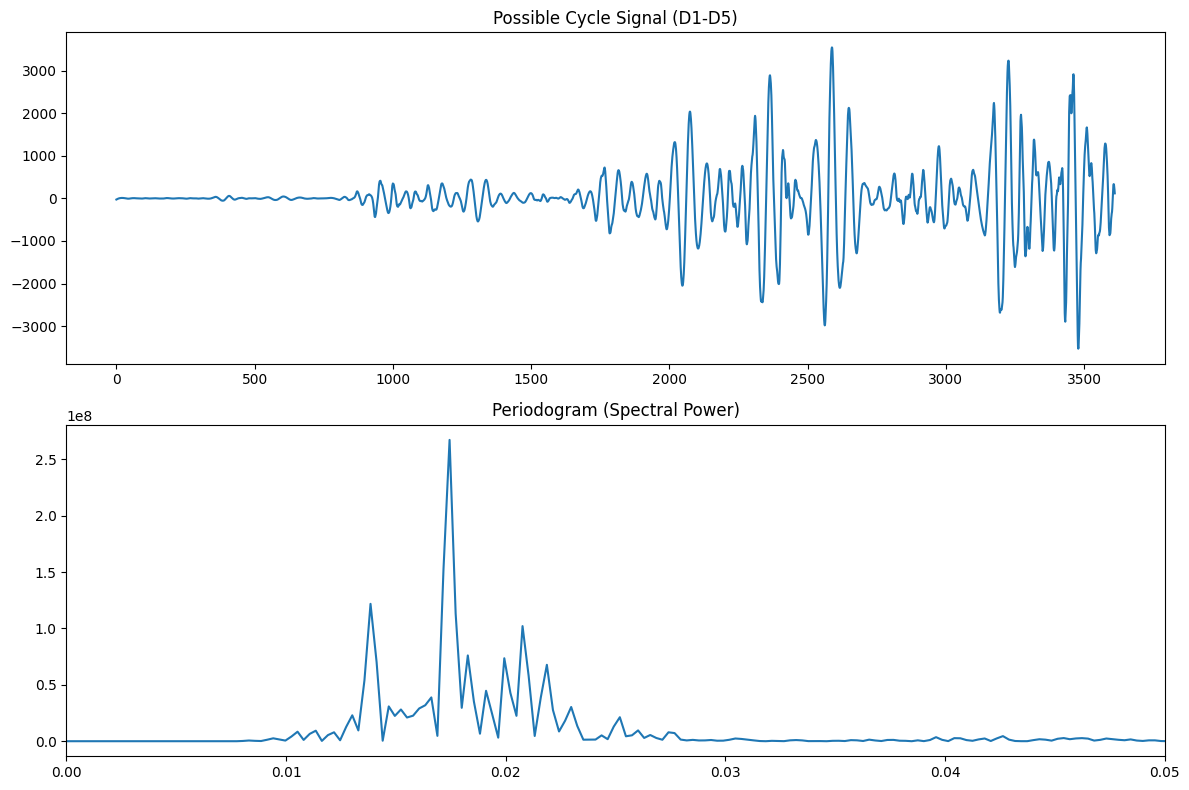

In [14]:
# –°–ø–µ–∫—Ç—Ä–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑
freqs, power = periodogram(cycle_component)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å–∏–≥–Ω–∞–ª–∞ –∏ —Å–ø–µ–∫—Ç—Ä–∞
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(cycle_component)
axs[0].set_title("Possible Cycle Signal (D1-D5)")

axs[1].plot(freqs, power)
axs[1].set_title("Periodogram (Spectral Power)")
axs[1].set_xlim(0, 0.05)

plt.savefig("spectr.png", dpi=300)

plt.tight_layout()
plt.show()

**–î–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Å–ø–µ–∫—Ç—Ä–∞–ª—å–Ω—É—é –º–æ—â–Ω–æ—Å—Ç—å –Ω–∞ —Ä–∞–∑–Ω—ã—Ö —á–∞—Å—Ç–æ—Ç–∞—Ö. –ü–∏–∫ –º–æ—â–Ω–æ—Å—Ç–∏ –Ω–∞ —á–∞—Å—Ç–æ—Ç–µ ~0.0174 (1/57.4) —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–º—É —Ü–∏–∫–ª—É.**
**–†–µ–∑–∫–∏–π –ø–∏–∫ –∏ –±—ã—Å—Ç—Ä–æ–µ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ –º–æ—â–Ω–æ—Å—Ç–∏ –Ω–∞ –¥—Ä—É–≥–∏—Ö —á–∞—Å—Ç–æ—Ç–∞—Ö —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —á—ë—Ç–∫–∏–π –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π —Ü–∏–∫–ª.**

In [15]:
dominant_freq_index = np.argmax(power[1:]) + 1  # –ø—Ä–æ–ø—É—Å–∫–∞–µ–º –Ω—É–ª–µ–≤—É—é —á–∞—Å—Ç–æ—Ç—É
dominant_freq = freqs[dominant_freq_index]
seasonal_period = int(round(1 / dominant_freq))

seasonal_period

57

In [16]:
y = cycle_component
t = np.arange(1, len(y) + 1)  # —Ç.–∫. –∏–Ω–¥–µ–∫—Å –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å 1

min_freq = 1/100  # –Ω–∞–ø—Ä–∏–º–µ—Ä, –º–∞–∫—Å–∏–º—É–º –ø–µ—Ä–∏–æ–¥ 100 —à–∞–≥–æ–≤
max_freq = 1/2   # –º–∏–Ω–∏–º—É–º –ø–µ—Ä–∏–æ–¥ 2 —à–∞–≥–∞ (Nyquist)
frequency, power = LombScargle(t, y).autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
best_freq = frequency[np.argmax(power)]
best_period = 1 / best_freq
print(f"Best frequency: {best_freq:.4f}")
print(f"Best period: {best_period:.2f}")

Best frequency: 0.0174
Best period: 57.40


## –ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é

In [18]:
coeffs_d_levels = coeffs_cycle_only[1:]  # –ò–≥–Ω–æ—Ä–∏—Ä—É–µ–º –Ω—É–ª–µ–≤–æ–π cA5

# –í—ã—Ä–∞–≤–Ω–∏–≤–∞–µ–º –¥–ª–∏–Ω—ã –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —á–µ—Ä–µ–∑ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—é
target_length = len(cycle_component)
features = []
for coeff in coeffs_d_levels:
    x_old = np.linspace(0, 1, len(coeff))
    x_new = np.linspace(0, 1, target_length)
    coeff_interp = np.interp(x_new, x_old, coeff)
    features.append(coeff_interp)
features = np.vstack(features).T  # (n_samples, n_levels)


In [19]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

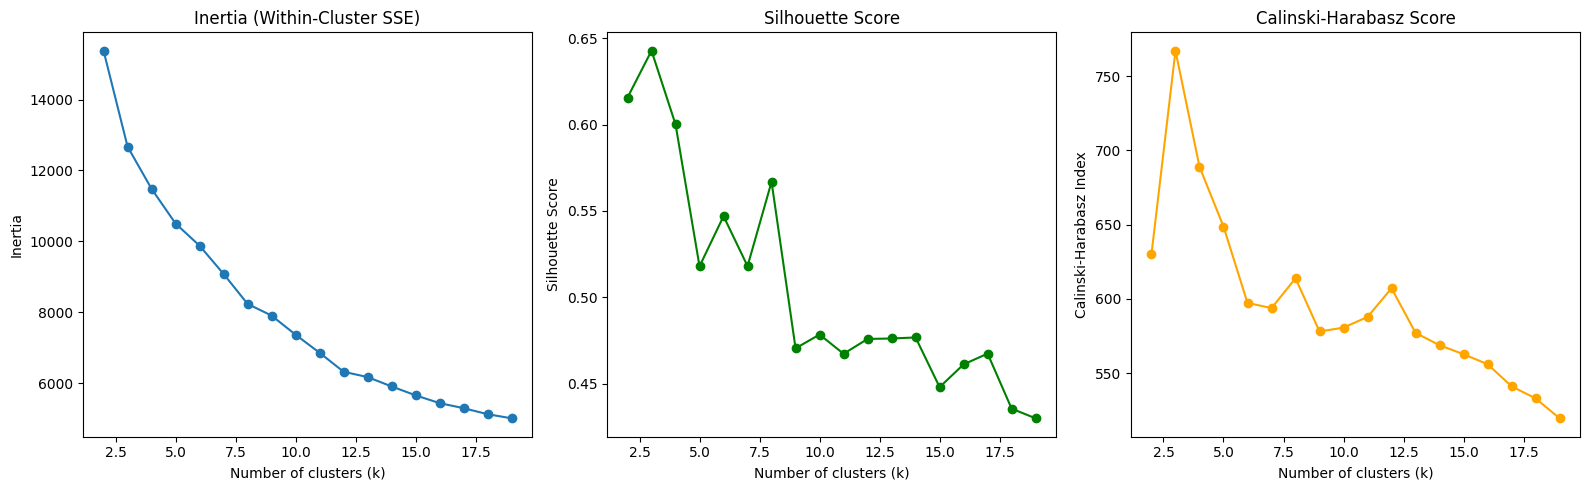

In [20]:
# –î–∏–∞–ø–∞–∑–æ–Ω –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
X = features_scaled
k_range = range(2, 20)

inertias = []
silhouettes = []
calinskis = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))
    calinskis.append(calinski_harabasz_score(X, labels))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤—Å–µ—Ö —Ç—Ä—ë—Ö –º–µ—Ç—Ä–∏–∫
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Inertia (Within-Cluster SSE)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(k_range, calinskis, marker='o', color='orange')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Index')

plt.savefig("num_clustrer.png", dpi=300)

plt.tight_layout()
plt.show()

–°–ª–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å. –ù–æ –ø–æ–ø—Ä–æ–±—É–µ–º 8/12

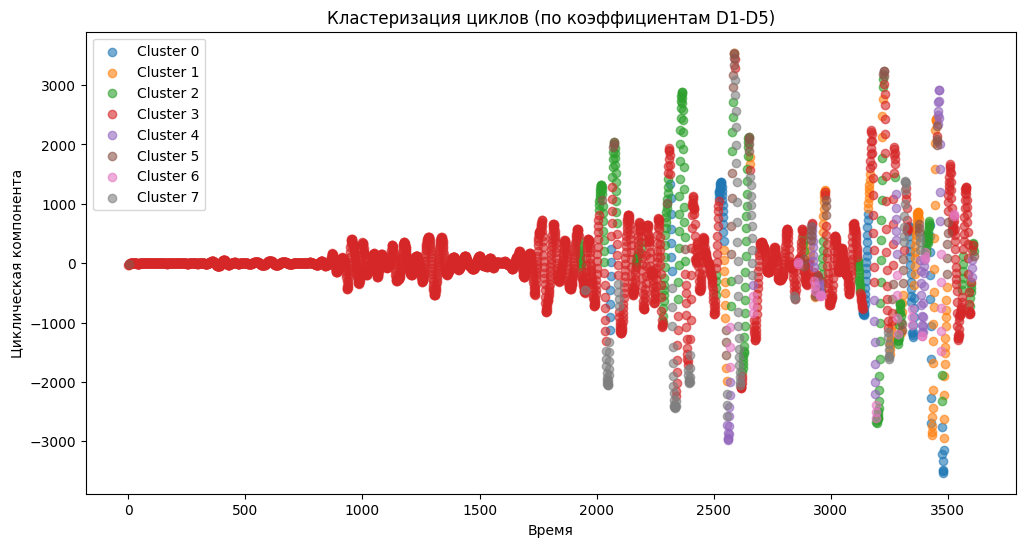

In [21]:
# –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 6))
for cluster_id in np.unique(clusters):
    plt.scatter(
        np.arange(len(cycle_component))[clusters == cluster_id],
        cycle_component[clusters == cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )
plt.title("–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Ü–∏–∫–ª–æ–≤ (–ø–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º D1-D5)")
plt.xlabel("–í—Ä–µ–º—è")
plt.ylabel("–¶–∏–∫–ª–∏—á–µ—Å–∫–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
plt.legend()
plt.show()

In [22]:
for cluster_id in np.unique(clusters):
    print(f"\nCluster {cluster_id}:")
    cluster_data = features_scaled[clusters == cluster_id]
    mean_coeffs = np.mean(cluster_data, axis=0)
    for level, value in enumerate(mean_coeffs, start=1):
        print(f"–£—Ä–æ–≤–µ–Ω—å D{level}: {value:.2f}")


Cluster 0:
–£—Ä–æ–≤–µ–Ω—å D1: 2.70
–£—Ä–æ–≤–µ–Ω—å D2: -1.18
–£—Ä–æ–≤–µ–Ω—å D3: -0.38
–£—Ä–æ–≤–µ–Ω—å D4: -0.08
–£—Ä–æ–≤–µ–Ω—å D5: -0.23

Cluster 1:
–£—Ä–æ–≤–µ–Ω—å D1: 0.97
–£—Ä–æ–≤–µ–Ω—å D2: 2.44
–£—Ä–æ–≤–µ–Ω—å D3: -1.91
–£—Ä–æ–≤–µ–Ω—å D4: -1.91
–£—Ä–æ–≤–µ–Ω—å D5: -0.49

Cluster 2:
–£—Ä–æ–≤–µ–Ω—å D1: -1.48
–£—Ä–æ–≤–µ–Ω—å D2: -1.33
–£—Ä–æ–≤–µ–Ω—å D3: -0.88
–£—Ä–æ–≤–µ–Ω—å D4: -0.64
–£—Ä–æ–≤–µ–Ω—å D5: -0.16

Cluster 3:
–£—Ä–æ–≤–µ–Ω—å D1: 0.01
–£—Ä–æ–≤–µ–Ω—å D2: 0.03
–£—Ä–æ–≤–µ–Ω—å D3: 0.05
–£—Ä–æ–≤–µ–Ω—å D4: 0.03
–£—Ä–æ–≤–µ–Ω—å D5: 0.01

Cluster 4:
–£—Ä–æ–≤–µ–Ω—å D1: -1.89
–£—Ä–æ–≤–µ–Ω—å D2: -1.13
–£—Ä–æ–≤–µ–Ω—å D3: 3.48
–£—Ä–æ–≤–µ–Ω—å D4: 3.76
–£—Ä–æ–≤–µ–Ω—å D5: 1.01

Cluster 5:
–£—Ä–æ–≤–µ–Ω—å D1: -0.28
–£—Ä–æ–≤–µ–Ω—å D2: 0.38
–£—Ä–æ–≤–µ–Ω—å D3: -1.12
–£—Ä–æ–≤–µ–Ω—å D4: -2.26
–£—Ä–æ–≤–µ–Ω—å D5: -4.23

Cluster 6:
–£—Ä–æ–≤–µ–Ω—å D1: -1.16
–£—Ä–æ–≤–µ–Ω—å D2: -2.04
–£—Ä–æ–≤–µ–Ω—å D3: 0.46
–£—Ä–æ–≤–µ–Ω—å D4: 1.10
–£—Ä–æ–≤–µ–Ω—å D5: 5.06

Cluster 7:
–£—Ä–æ–≤–µ–Ω—å D1: 1.59
–£—Ä–æ–≤–µ–Ω—å D2: 1

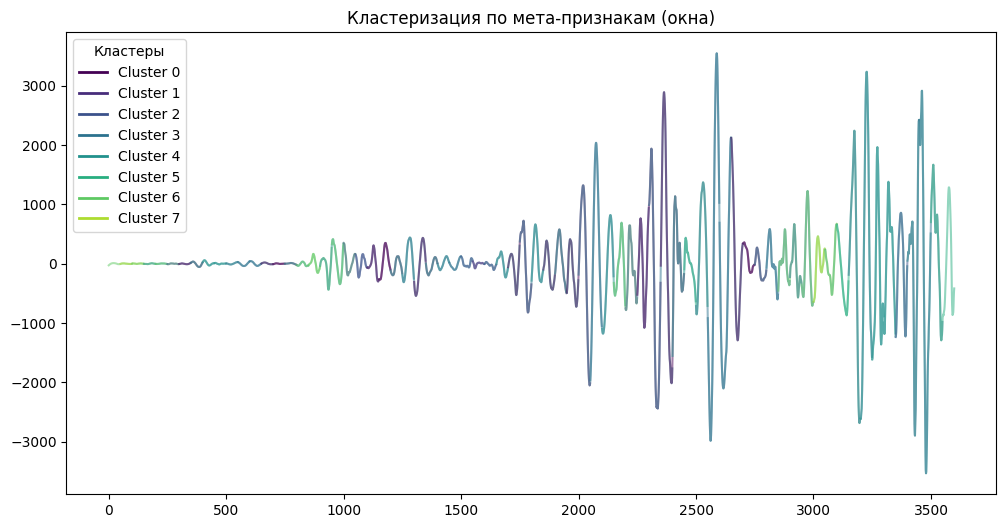

In [23]:
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–∫–æ–Ω
window_size = 100  # –†–∞–∑–º–µ—Ä –æ–∫–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
n_clusters = 8

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–∫–Ω–∞
def extract_features(window):
    features = []
    # 1. –≠–Ω–µ—Ä–≥–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ D1-D5
    for coeff in coeffs_d_levels:
        coeff_window = coeff[:len(window)]  # –û–±—Ä–µ–∑–∞–µ–º –ø–æ–¥ –¥–ª–∏–Ω—É –æ–∫–Ω–∞
        features.append(np.sum(coeff_window**2))  # –≠–Ω–µ—Ä–≥–∏—è
    # 2. –î–æ–º–∏–Ω–∏—Ä—É—é—â–∞—è —á–∞—Å—Ç–æ—Ç–∞ (Lomb-Scargle)
    t = np.arange(len(window))
    freq, power = LombScargle(t, window).autopower(minimum_frequency=1/200, maximum_frequency=1/2)
    dominant_freq = freq[np.argmax(power)]
    features.extend([dominant_freq, 1/dominant_freq])  # –ß–∞—Å—Ç–æ—Ç–∞ –∏ –ø–µ—Ä–∏–æ–¥
    return features

# –ü—Ä–∏–º–µ–Ω—è–µ–º –∫ —Å–∫–æ–ª—å–∑—è—â–∏–º –æ–∫–Ω–∞–º
X = []
for i in range(0, len(cycle_component) - window_size, window_size // 2):
    window = cycle_component[i:i + window_size]
    X.append(extract_features(window))
X = np.array(X)

# –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
kmeans2 = KMeans(n_clusters=n_clusters, random_state=42)
clusters_window = kmeans2.fit_predict(X)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
cluster_colors = {
    cluster_id: plt.cm.viridis(cluster_id / n_clusters)
    for cluster_id in np.unique(clusters_window)
}

plt.figure(figsize=(12, 6))

for i, cluster_id in enumerate(clusters_window):
    start = i * (window_size // 2)
    end = start + window_size
    plt.plot(np.arange(start, end), cycle_component[start:end], 
             color=cluster_colors[cluster_id], alpha=0.5)

# –°–æ–∑–¥–∞–Ω–∏–µ —Ä—É—á–µ–∫ (lines) –¥–ª—è –ª–µ–≥–µ–Ω–¥—ã
legend_lines = [
    plt.Line2D([0], [0], color=color, lw=2, label=f'Cluster {cluster_id}')
    for cluster_id, color in cluster_colors.items()
]

plt.title("–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –ø–æ –º–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–∞–º (–æ–∫–Ω–∞)")
plt.legend(handles=legend_lines, title="–ö–ª–∞—Å—Ç–µ—Ä—ã")
plt.show()

In [24]:
for cluster_id in np.unique(clusters_window):
    print(f"\nCluster {cluster_id}:")
    cluster_data = features_scaled[clusters == cluster_id]
    mean_coeffs = np.mean(cluster_data, axis=0)
    for level, value in enumerate(mean_coeffs, start=1):
        print(f"–£—Ä–æ–≤–µ–Ω—å D{level}: {value:.2f}")


Cluster 0:
–£—Ä–æ–≤–µ–Ω—å D1: 2.70
–£—Ä–æ–≤–µ–Ω—å D2: -1.18
–£—Ä–æ–≤–µ–Ω—å D3: -0.38
–£—Ä–æ–≤–µ–Ω—å D4: -0.08
–£—Ä–æ–≤–µ–Ω—å D5: -0.23

Cluster 1:
–£—Ä–æ–≤–µ–Ω—å D1: 0.97
–£—Ä–æ–≤–µ–Ω—å D2: 2.44
–£—Ä–æ–≤–µ–Ω—å D3: -1.91
–£—Ä–æ–≤–µ–Ω—å D4: -1.91
–£—Ä–æ–≤–µ–Ω—å D5: -0.49

Cluster 2:
–£—Ä–æ–≤–µ–Ω—å D1: -1.48
–£—Ä–æ–≤–µ–Ω—å D2: -1.33
–£—Ä–æ–≤–µ–Ω—å D3: -0.88
–£—Ä–æ–≤–µ–Ω—å D4: -0.64
–£—Ä–æ–≤–µ–Ω—å D5: -0.16

Cluster 3:
–£—Ä–æ–≤–µ–Ω—å D1: 0.01
–£—Ä–æ–≤–µ–Ω—å D2: 0.03
–£—Ä–æ–≤–µ–Ω—å D3: 0.05
–£—Ä–æ–≤–µ–Ω—å D4: 0.03
–£—Ä–æ–≤–µ–Ω—å D5: 0.01

Cluster 4:
–£—Ä–æ–≤–µ–Ω—å D1: -1.89
–£—Ä–æ–≤–µ–Ω—å D2: -1.13
–£—Ä–æ–≤–µ–Ω—å D3: 3.48
–£—Ä–æ–≤–µ–Ω—å D4: 3.76
–£—Ä–æ–≤–µ–Ω—å D5: 1.01

Cluster 5:
–£—Ä–æ–≤–µ–Ω—å D1: -0.28
–£—Ä–æ–≤–µ–Ω—å D2: 0.38
–£—Ä–æ–≤–µ–Ω—å D3: -1.12
–£—Ä–æ–≤–µ–Ω—å D4: -2.26
–£—Ä–æ–≤–µ–Ω—å D5: -4.23

Cluster 6:
–£—Ä–æ–≤–µ–Ω—å D1: -1.16
–£—Ä–æ–≤–µ–Ω—å D2: -2.04
–£—Ä–æ–≤–µ–Ω—å D3: 0.46
–£—Ä–æ–≤–µ–Ω—å D4: 1.10
–£—Ä–æ–≤–µ–Ω—å D5: 5.06

Cluster 7:
–£—Ä–æ–≤–µ–Ω—å D1: 1.59
–£—Ä–æ–≤–µ–Ω—å D2: 1

1. –ö–ª–∞—Å—Ç–µ—Ä 0: –í—ã—Å–æ–∫–æ—á–∞—Å—Ç–æ—Ç–Ω—ã–π (52 –¥–Ω—è)
–•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏:
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è –≤ D1 (2.70) ‚Äì –≤—ã—Å–æ–∫–æ—á–∞—Å—Ç–æ—Ç–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è
- –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è D2-D5 ‚Äì –ø–æ–¥–∞–≤–ª–µ–Ω–∏–µ –Ω–∏–∑–∫–∏—Ö —á–∞—Å—Ç–æ—Ç
- 
–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- –≠—Ç–æ "—à—É–º–æ–≤—ã–µ" –∫–æ–ª–µ–±–∞–Ω–∏—è (–≤–Ω—É—Ç—Ä–∏–¥–Ω–µ–≤–Ω–∞—è –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å)
- –ú–æ–≥—É—Ç –æ—Ç—Ä–∞–∂–∞—Ç—å —Ä–µ–∞–∫—Ü–∏—é –Ω–∞ –Ω–æ–≤–æ—Å—Ç–∏ –∏–ª–∏ –ª–∏–∫–≤–∏–¥–Ω–æ—Å—Ç—å —Ä—ã–Ω–∫–∞

–ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ:

threshold = np.percentile(coeffs_d_levels[0], 90)
high_volatility_mask = coeffs_d_levels[0] > threshold

2. –ö–ª–∞—Å—Ç–µ—Ä 4: –°—Ä–µ–¥–Ω–µ—Å—Ä–æ—á–Ω—ã–µ —Ü–∏–∫–ª—ã (47 –¥–Ω–µ–π)

–•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏:
- –ü–∏–∫–∏ –≤ D3 (3.48) –∏ D4 (3.76) ‚Äì —Å—Ä–µ–¥–Ω–∏–µ —á–∞—Å—Ç–æ—Ç—ã
- –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è D5 (1.01) ‚Äì —Å–≤—è–∑—å —Å —Ç—Ä–µ–Ω–¥–æ–º

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- –í–æ–∑–º–æ–∂–Ω–æ, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ü–∏–∫–ª–∞–º –ª–∏–∫–≤–∏–¥–Ω–æ—Å—Ç–∏
- –ú–æ–∂–µ—Ç —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å –ø–µ—Ä–∏–æ–¥–∞–º–∏ —Ä–µ–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫—Ä—É–ø–Ω—ã—Ö —Ñ–æ–Ω–¥–æ–≤

3. –ö–ª–∞—Å—Ç–µ—Ä 6: –ù–∏–∑–∫–æ—á–∞—Ç–æ—Ç–Ω—ã–µ —Ü–∏–∫–ª—ã (43-66 –¥–Ω–µ–π)
–•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏:
- –ú–∞–∫—Å–∏–º—É–º –≤ D5 (5.06) ‚Äì –Ω–∏–∑–∫–æ—á–∞—Å—Ç–æ—Ç–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞
- –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ D1-D2 ‚Äì –ø–æ–¥–∞–≤–ª–µ–Ω–∏–µ —à—É–º–∞

- –ú–æ–∂–µ—Ç –æ—Ç—Ä–∞–∂–∞—Ç—å "—Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å" –∫—Ä–∏–ø—Ç–æ—Ä—ã–Ω–∫–∞

–ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑—ã:


–¢–æ—Ä–≥–æ–≤—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏:

- –î–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∞ 0 (D1): –ò–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞—Ç—å –∏–ª–∏ —Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å (—ç—Ç–æ —à—É–º/–≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å).
- –î–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∞ 4 (D3-D4): –û—Å—Ü–∏–ª–ª—è—Ç–æ—Ä—ã —Å –æ–∫–Ω–æ–º ~47 –¥–Ω–µ–π.
- –î–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∞ 6 (D5): –¢—Ä–µ–Ω–¥–æ–≤—ã–µ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã (—Å–∫–æ–ª—å–∑—è—â–∏–µ 200 –¥–Ω–µ–π).

In [26]:
features_df = pd.DataFrame(X, columns=[f'Energy_D{i+1}' for i in range(5)] + ['Dominant_freq', 'Dominant_period'])
features_df['Cluster'] = clusters_window

# –°—Ä–µ–¥–Ω—è—è —á–∞—Å—Ç–æ—Ç–∞ –∏ –ø–µ—Ä–∏–æ–¥ –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É
freq_stats = features_df.groupby('Cluster')[['Dominant_freq', 'Dominant_period']].agg(['mean', 'std'])
print(freq_stats)

        Dominant_freq      Dominant_period     
                 mean  std            mean  std
Cluster                                        
0            0.019141  0.0       52.242744  0.0
1            0.009040  NaN      110.614525  NaN
2            0.025202  0.0       39.679359  0.0
3            0.017121  0.0       58.407080  0.0
4            0.021162  0.0       47.255370  0.0
5            0.015101  0.0       66.220736  0.0
6            0.023182  0.0       43.137255  0.0
7            0.027222  0.0       36.734694  0.0


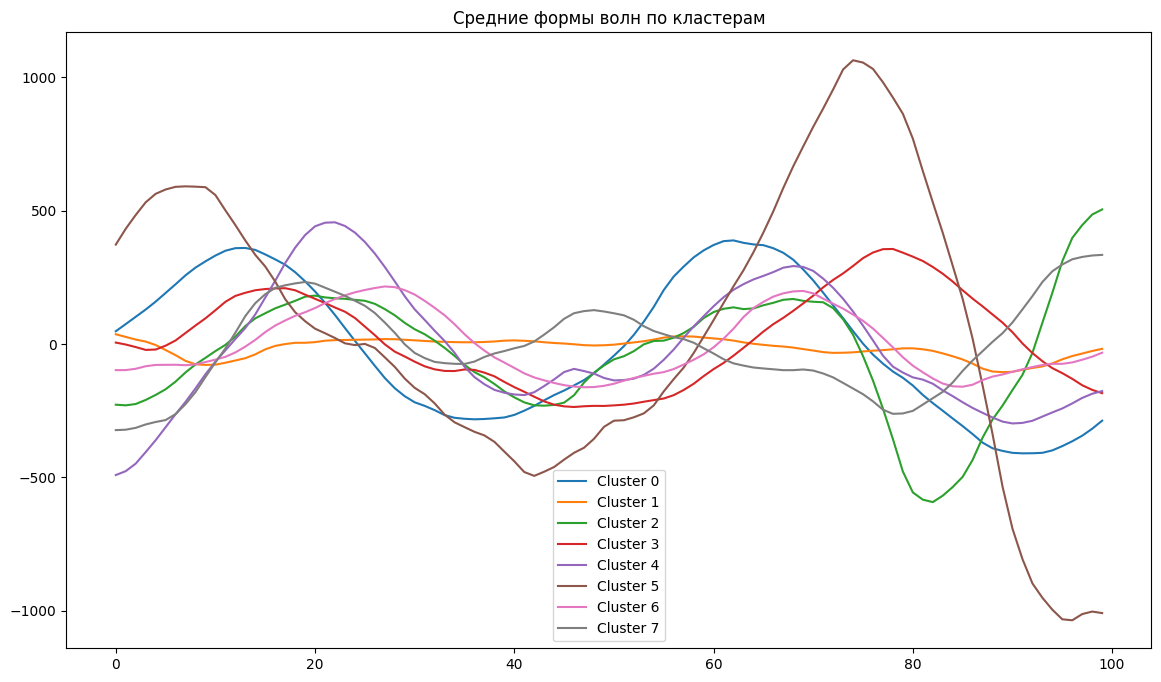

In [27]:
cluster_avg_waveforms = {i: [] for i in range(n_clusters)}

for i, cluster_id in enumerate(clusters_window):
    start = i * (window_size // 2)
    end = start + window_size
    segment = cycle_component[start:end]
    if len(segment) == window_size:
        cluster_avg_waveforms[cluster_id].append(segment)

# –°—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω—é—é —Ñ–æ—Ä–º—É
plt.figure(figsize=(14, 8))
for cluster_id, segments in cluster_avg_waveforms.items():
    mean_waveform = np.mean(segments, axis=0)
    plt.plot(mean_waveform, label=f'Cluster {cluster_id}')

plt.title("–°—Ä–µ–¥–Ω–∏–µ —Ñ–æ—Ä–º—ã –≤–æ–ª–Ω –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º")
plt.legend()
plt.show()

Text(0.5, 1.0, '–ö–ª–∞—Å—Ç–µ—Ä 4: 47-–¥–Ω–µ–≤–Ω—ã–µ —Ü–∏–∫–ª—ã')

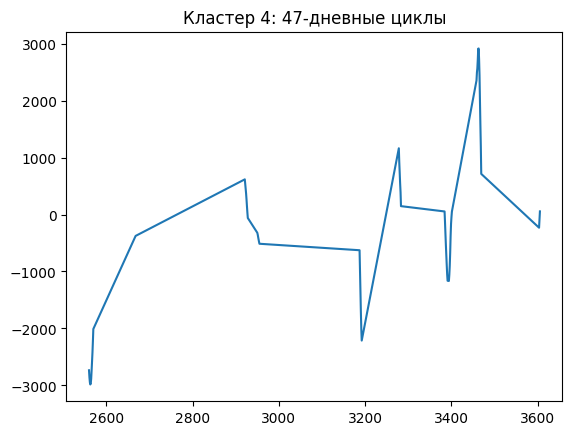

In [28]:
cluster4_mask = clusters == 4
plt.plot(t[cluster4_mask], cycle_component[cluster4_mask])
plt.title("–ö–ª–∞—Å—Ç–µ—Ä 4: 47-–¥–Ω–µ–≤–Ω—ã–µ —Ü–∏–∫–ª—ã")


## –ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é (–Ω–∞ 5 –∫–ª–∞—Å—Ç–µ—Ä–∞—Ö)

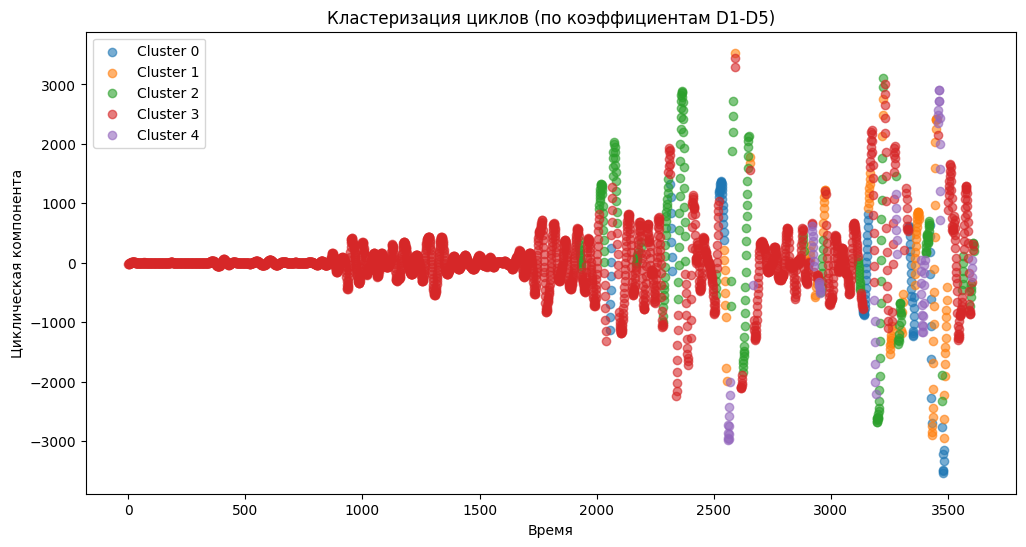

In [36]:
# –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_5 = kmeans_5.fit_predict(features_scaled)


# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 6))
for cluster_id in np.unique(clusters_5):
    plt.scatter(
        np.arange(len(cycle_component))[clusters == cluster_id],
        cycle_component[clusters == cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )
plt.title("–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Ü–∏–∫–ª–æ–≤ (–ø–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º D1-D5)")
plt.xlabel("–í—Ä–µ–º—è")
plt.ylabel("–¶–∏–∫–ª–∏—á–µ—Å–∫–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
plt.legend()
plt.show()

In [51]:
t = np.arange(len(cycle_component))  # –≤—Ä–µ–º–µ–Ω–Ω–∞—è —à–∫–∞–ª–∞

for cluster_id in range(n_clusters):  # –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Å–µ –∫–ª–∞—Å—Ç–µ—Ä—ã
    cluster_mask = clusters_5 == cluster_id
    cluster_size = np.sum(cluster_mask)
    
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {cluster_id}: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = {cluster_size}")
    
    if cluster_size < 3:
        print(f"  –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–æ—á–µ–∫ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞\n")
        continue
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å–ø–µ–∫—Ç—Ä–∞ –õ–æ–º–±–∞-–®—Ç–∞—Ä–≥–µ—Å—Å–∞
    freq, power = LombScargle(t[cluster_mask], cycle_component[cluster_mask]).autopower(
        minimum_frequency=1/200,  # –º–∞–∫—Å –ø–µ—Ä–∏–æ–¥ 200 –¥–Ω–µ–π
        maximum_frequency=1/2     # –º–∏–Ω –ø–µ—Ä–∏–æ–¥ 2 –¥–Ω—è
    )
    
    dominant_period = 1 / freq[np.argmax(power)]
    print(f"  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = {dominant_period:.1f} –¥–Ω–µ–π\n")

–ö–ª–∞—Å—Ç–µ—Ä 0: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 2885
  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = 57.2 –¥–Ω–µ–π

–ö–ª–∞—Å—Ç–µ—Ä 1: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 168
  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = 57.6 –¥–Ω–µ–π

–ö–ª–∞—Å—Ç–µ—Ä 2: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 335
  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = 57.5 –¥–Ω–µ–π

–ö–ª–∞—Å—Ç–µ—Ä 3: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 78
  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = 57.8 –¥–Ω–µ–π

–ö–ª–∞—Å—Ç–µ—Ä 4: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 146
  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = 48.1 –¥–Ω–µ–π



In [50]:
for cluster_id in np.unique(clusters_5):
    print(f"\nCluster {cluster_id}:")
    cluster_data = features_scaled[clusters == cluster_id]
    mean_coeffs = np.mean(cluster_data, axis=0)
    for level, value in enumerate(mean_coeffs, start=1):
        print(f"–£—Ä–æ–≤–µ–Ω—å D{level}: {value:.2f}")


Cluster 0:
–£—Ä–æ–≤–µ–Ω—å D1: 2.70
–£—Ä–æ–≤–µ–Ω—å D2: -1.18
–£—Ä–æ–≤–µ–Ω—å D3: -0.38
–£—Ä–æ–≤–µ–Ω—å D4: -0.08
–£—Ä–æ–≤–µ–Ω—å D5: -0.23

Cluster 1:
–£—Ä–æ–≤–µ–Ω—å D1: 0.97
–£—Ä–æ–≤–µ–Ω—å D2: 2.44
–£—Ä–æ–≤–µ–Ω—å D3: -1.91
–£—Ä–æ–≤–µ–Ω—å D4: -1.91
–£—Ä–æ–≤–µ–Ω—å D5: -0.49

Cluster 2:
–£—Ä–æ–≤–µ–Ω—å D1: -1.48
–£—Ä–æ–≤–µ–Ω—å D2: -1.33
–£—Ä–æ–≤–µ–Ω—å D3: -0.88
–£—Ä–æ–≤–µ–Ω—å D4: -0.64
–£—Ä–æ–≤–µ–Ω—å D5: -0.16

Cluster 3:
–£—Ä–æ–≤–µ–Ω—å D1: 0.01
–£—Ä–æ–≤–µ–Ω—å D2: 0.03
–£—Ä–æ–≤–µ–Ω—å D3: 0.05
–£—Ä–æ–≤–µ–Ω—å D4: 0.03
–£—Ä–æ–≤–µ–Ω—å D5: 0.01

Cluster 4:
–£—Ä–æ–≤–µ–Ω—å D1: -1.89
–£—Ä–æ–≤–µ–Ω—å D2: -1.13
–£—Ä–æ–≤–µ–Ω—å D3: 3.48
–£—Ä–æ–≤–µ–Ω—å D4: 3.76
–£—Ä–æ–≤–µ–Ω—å D5: 1.01


In [54]:
clusters_5 = np.array(clusters_5)  # —É–±–µ–¥–∏—Å—å, —á—Ç–æ —ç—Ç–æ np.array —Å –º–µ—Ç–∫–∞–º–∏ 0..4

# –°–æ–∑–¥–∞—ë–º –Ω–æ–≤—ã–π –º–∞—Å—Å–∏–≤ –º–µ—Ç–æ–∫
clusters_optimized = np.empty_like(clusters_5)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º 1, 2, 3 –≤ –∫–ª–∞—Å—Ç–µ—Ä 0
clusters_optimized[np.isin(clusters_5, [0, 1, 2, 3])] = 0

# –ö–ª–∞—Å—Ç–µ—Ä—ã 4 –æ–±—ä–µ–¥–∏–Ω—è–µ–º –≤ –∫–ª–∞—Å—Ç–µ—Ä 1
clusters_optimized[np.isin(clusters_5, [4])] = 1

# –ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è:", np.unique(clusters_optimized))

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –Ω–æ–≤—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–∞—Ö
for c in np.unique(clusters_optimized):
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {c}: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = {np.sum(clusters_optimized == c)}")

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: [0 1]
–ö–ª–∞—Å—Ç–µ—Ä 0: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 3466
–ö–ª–∞—Å—Ç–µ—Ä 1: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 146


In [55]:
t = np.arange(len(cycle_component))  # –≤—Ä–µ–º–µ–Ω–Ω–∞—è —à–∫–∞–ª–∞

for cluster_id in np.unique(clusters_optimized):  # –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Å–µ –∫–ª–∞—Å—Ç–µ—Ä—ã
    cluster_mask = clusters_optimized == cluster_id
    cluster_size = np.sum(cluster_mask)
    
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {cluster_id}: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = {cluster_size}")
    
    if cluster_size < 3:
        print(f"  –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–æ—á–µ–∫ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞\n")
        continue
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å–ø–µ–∫—Ç—Ä–∞ –õ–æ–º–±–∞-–®—Ç–∞—Ä–≥–µ—Å—Å–∞
    freq, power = LombScargle(t[cluster_mask], cycle_component[cluster_mask]).autopower(
        minimum_frequency=1/200,  # –º–∞–∫—Å –ø–µ—Ä–∏–æ–¥ 200 –¥–Ω–µ–π
        maximum_frequency=1/2     # –º–∏–Ω –ø–µ—Ä–∏–æ–¥ 2 –¥–Ω—è
    )
    
    dominant_period = 1 / freq[np.argmax(power)]
    print(f"  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = {dominant_period:.1f} –¥–Ω–µ–π\n")

–ö–ª–∞—Å—Ç–µ—Ä 0: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 3466
  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = 57.3 –¥–Ω–µ–π

–ö–ª–∞—Å—Ç–µ—Ä 1: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ = 146
  –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥ = 48.1 –¥–Ω–µ–π



In [58]:
_, p_value = ttest_ind(cycle_component[clusters_optimized == 0],
                      cycle_component[clusters_optimized == 1])
print(f"p-value: {p_value:.3f}")  # –ï—Å–ª–∏ < 0.05, –∫–ª–∞—Å—Ç–µ—Ä 1 —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º

p-value: 0.000


| –ö–ª–∞—Å—Ç–µ—Ä                 | –ö–æ–ª   —Ç–æ—á–µ–∫     | –ü–µ—Ä–∏–æ–¥                  | –î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–µ —É—Ä–æ–≤–Ω–∏ | –§–∏–Ω–∞–Ω—Å–æ–≤–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è |
|--------------------------|------------|-----------------------------|--------------------|-----------------------|
| 0        | 3466      | 	57.4  | D1 (2.70), D2 (-1.18) | 	–û—Å–Ω–æ–≤–Ω–æ–π —Ä—ã–Ω–æ—á–Ω—ã–π —Ü–∏–∫–ª (–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ –æ—Ç—á—ë—Ç—ã)|
|4|	146|	48.1|	D3 (3.48), D4 (3.76)|	–°–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏–µ —Å–æ–±—ã—Ç–∏—è (—Ä–µ–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏, —Ñ–æ—Ä–∫–∏)|

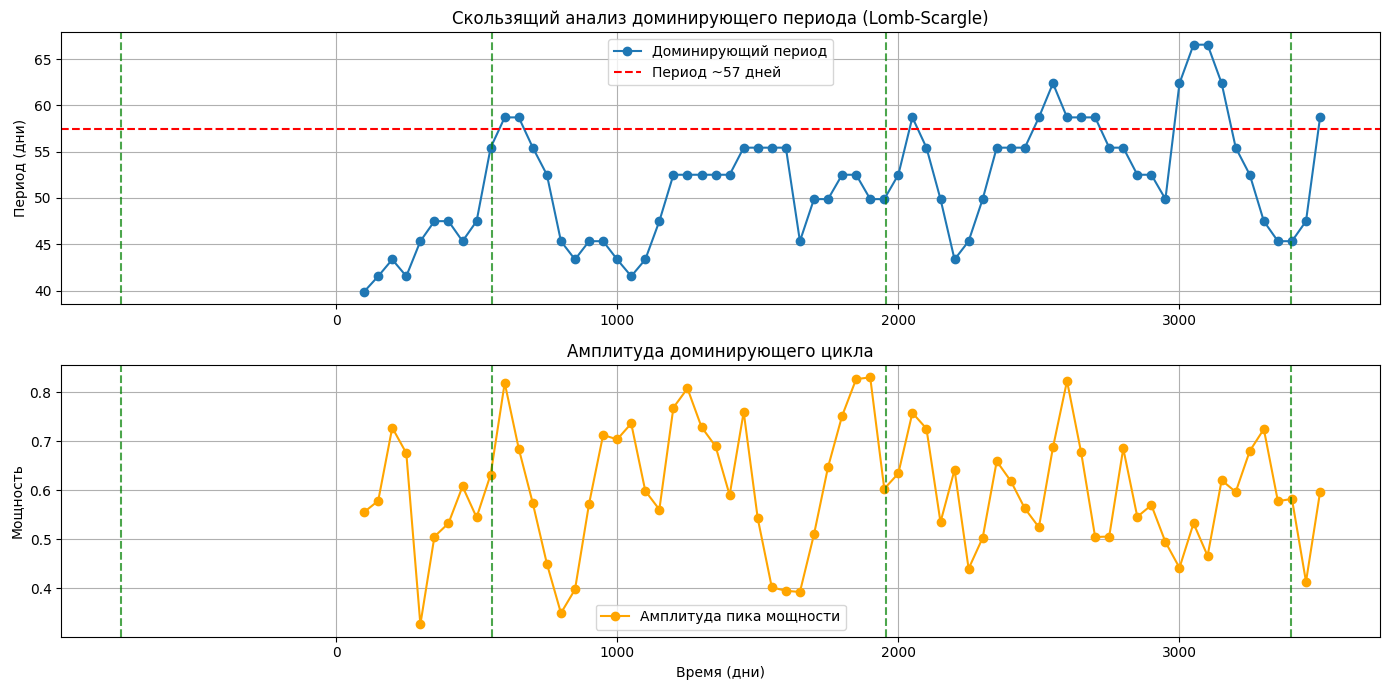

In [65]:
y = cycle_component
t = np.arange(1, len(y) + 1)  # –≤—Ä–µ–º–µ–Ω–Ω–∞—è —à–∫–∞–ª–∞

window_size = 200
step = 50

min_freq = 1/100
max_freq = 1/2

dominant_periods = []
dominant_powers = []
window_centers = []

for start in range(0, len(y) - window_size + 1, step):
    window_t = t[start:start + window_size]
    window_y = y[start:start + window_size]
    
    frequency, power = LombScargle(window_t, window_y).autopower(
        minimum_frequency=min_freq,
        maximum_frequency=max_freq
    )
    
    idx_max = np.argmax(power)
    best_freq = frequency[idx_max]
    best_period = 1 / best_freq
    best_power = power[idx_max]
    
    dominant_periods.append(best_period)
    dominant_powers.append(best_power)
    window_centers.append(start + window_size // 2)

plt.figure(figsize=(14, 7))

# –ì—Ä–∞—Ñ–∏–∫ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞
plt.subplot(2, 1, 1)
plt.plot(window_centers, dominant_periods, marker='o', label='–î–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø–µ—Ä–∏–æ–¥')
plt.axhline(57.4, color='red', linestyle='--', label='–ü–µ—Ä–∏–æ–¥ ~57 –¥–Ω–µ–π')
plt.title('–°–∫–æ–ª—å–∑—è—â–∏–π –∞–Ω–∞–ª–∏–∑ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ (Lomb-Scargle)')
plt.ylabel('–ü–µ—Ä–∏–æ–¥ (–¥–Ω–∏)')
plt.legend()
plt.grid(True)

# –ì—Ä–∞—Ñ–∏–∫ –∞–º–ø–ª–∏—Ç—É–¥—ã –ø–∏–∫–∞ –º–æ—â–Ω–æ—Å—Ç–∏
plt.subplot(2, 1, 2)
plt.plot(window_centers, dominant_powers, marker='o', color='orange', label='–ê–º–ø–ª–∏—Ç—É–¥–∞ –ø–∏–∫–∞ –º–æ—â–Ω–æ—Å—Ç–∏')
plt.title('–ê–º–ø–ª–∏—Ç—É–¥–∞ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–≥–æ —Ü–∏–∫–ª–∞')
plt.xlabel('–í—Ä–µ–º—è (–¥–Ω–∏)')
plt.ylabel('–ú–æ—â–Ω–æ—Å—Ç—å')
plt.legend()
plt.grid(True)

# –î–æ–±–∞–≤–∏–º –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ –¥–ª—è –¥–∞—Ç —Ö–∞–ª–≤–∏–Ω–≥–æ–≤
# –î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ –∑–Ω–∞—Ç—å –∏–Ω–¥–µ–∫—Å –≤ t –¥–ª—è –∫–∞–∂–¥–æ–π –¥–∞—Ç—ã —Ö–∞–ª–≤–∏–Ω–≥–∞
# –î–æ–ø—É—Å—Ç–∏–º, —É —Ç–µ–±—è –µ—Å—Ç—å –º–∞—Å—Å–∏–≤ —Å –¥–∞—Ç–∞–º–∏ –Ω–∞—á–∞–ª–∞ —Ä—è–¥–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 2015-01-01)
# –∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω—Ç–µ—Ä–≤–∞–ª ‚Äî 1 –¥–µ–Ω—å

start_date = datetime.datetime(2015, 1, 1)
halving_dates = [
    datetime.datetime(2012, 11, 28),
    datetime.datetime(2016, 7, 9),
    datetime.datetime(2020, 5, 11),
    datetime.datetime(2024, 4, 20),
]

# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –¥–∞—Ç—ã –≤ –∏–Ω–¥–µ–∫—Å—ã
halving_indices = [(hd - start_date).days for hd in halving_dates]

for ax in plt.gcf().axes:
    for hi in halving_indices:
        ax.axvline(hi, color='green', linestyle='--', alpha=0.7, label='–•–∞–ª–≤–∏–Ω–≥')

plt.tight_layout()
plt.show()

In [66]:
full_data = pd.read_excel("bitcoin.xlsx")

In [67]:
full_data = full_data.sort_values('–î–∞—Ç–∞', ignore_index=True)
full_data

–î–∞—Ç–∞       –ó–Ω–∞—á–µ–Ω–∏–µ
0    2015-05-06     229.780000
1    2015-05-07     237.330000
2    2015-05-08     243.860000
3    2015-05-09     241.830000
4    2015-05-10     240.300000
...         ...            ...
3607 2025-05-30  104694.787188
3608 2025-05-31  103803.121799
3609 2025-06-01  105233.374133
3610 2025-06-02  104839.027304
3611 2025-06-03  105927.194148

[3612 rows x 2 columns]

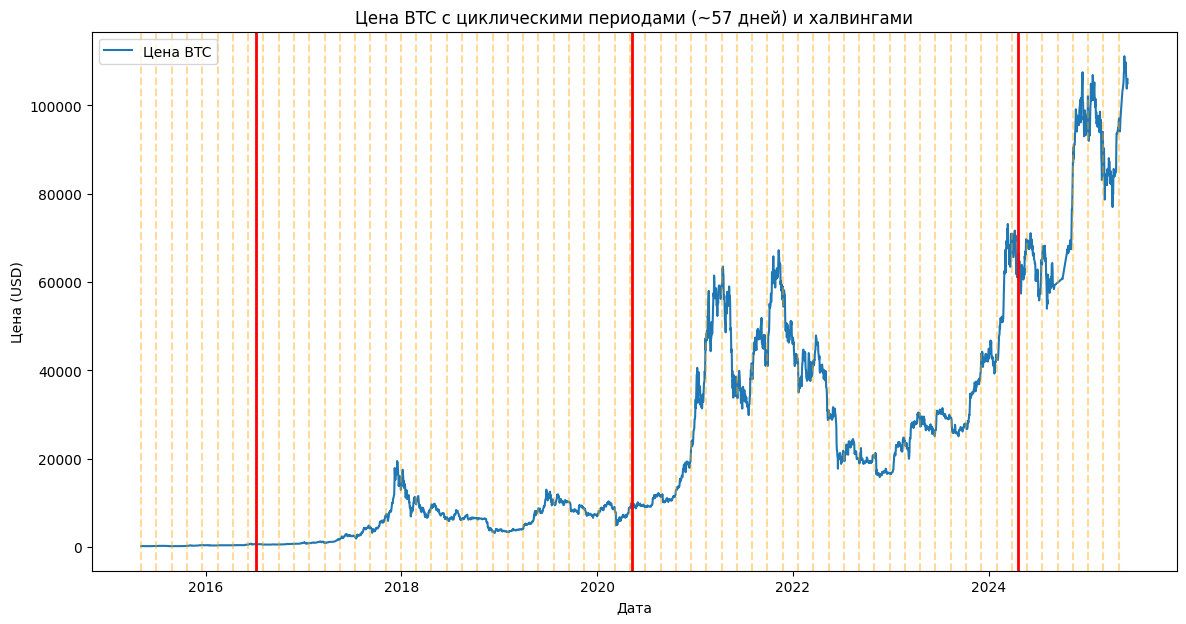

In [68]:
time_index = full_data['–î–∞—Ç–∞']
price = full_data['–ó–Ω–∞—á–µ–Ω–∏–µ']

# –î–∞—Ç—ã —Ö–∞–ª–≤–∏–Ω–≥–æ–≤ (—É–∂–µ —É —Ç–µ–±—è –µ—Å—Ç—å)
halving_dates = [
    datetime.datetime(2012, 11, 28),
    datetime.datetime(2016, 7, 9),
    datetime.datetime(2020, 5, 11),
    datetime.datetime(2024, 4, 20),
]

cycle_period = 57  # –ø–µ—Ä–∏–æ–¥ —Ü–∏–∫–ª–æ–≤ –≤ –¥–Ω—è—Ö

start_date = time_index.iloc[0]
end_date = time_index.iloc[-1]

# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞—Ç—ã —Ü–∏–∫–ª–æ–≤ —Å —à–∞–≥–æ–º 57 –¥–Ω–µ–π
cycle_dates = []
current_date = start_date
while current_date <= end_date:
    cycle_dates.append(current_date)
    current_date += datetime.timedelta(days=cycle_period)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(14, 7))
plt.plot(time_index, price, label='–¶–µ–Ω–∞ BTC')

for cd in cycle_dates:
    plt.axvline(cd, color='orange', linestyle='--', alpha=0.4)

for i, hd in enumerate(halving_dates):
    # –ï—Å–ª–∏ —Ö–∞–ª–≤–∏–Ω–≥ –≤–Ω–µ –ø–µ—Ä–∏–æ–¥–∞, –º–æ–∂–Ω–æ –µ–≥–æ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å
    if start_date <= hd <= end_date:
        plt.axvline(hd, color='red', linestyle='-', linewidth=2, label='–•–∞–ª–≤–∏–Ω–≥' if i == 0 else "")

plt.title('–¶–µ–Ω–∞ BTC —Å —Ü–∏–∫–ª–∏—á–µ—Å–∫–∏–º–∏ –ø–µ—Ä–∏–æ–¥–∞–º–∏ (~57 –¥–Ω–µ–π) –∏ —Ö–∞–ª–≤–∏–Ω–≥–∞–º–∏')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–¶–µ–Ω–∞ (USD)')
plt.legend()
plt.show()

"–ì–æ–¥ –ø–æ—Å–ª–µ —Ö–∞–ª–≤–∏–Ω–≥–∞ ‚Äî —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∑–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è, –ø–æ—Ç–æ–º ‚Äî —Ä–æ—Å—Ç, –≤–æ–ª–Ω—ã –Ω–∞ –Ω–æ–≤–æ–º —É—Ä–æ–≤–Ω–µ, –∏ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ. –ó–∞—Ç–µ–º —Å–Ω–æ–≤–∞ –ø–æ–¥—ä–µ–º –Ω–∞ —É—Ä–æ–≤–µ–Ω—å –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ —Å–∫–∞—á–∫–∞ –∏ —Å–Ω–æ–≤–∞ –æ–∂–∏–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ —Ö–∞–ª–≤–∏–Ω–≥–∞". - –Ω–æ–≤–∞—è –≥–∏–ø–ø–æ—Ç–µ–∑–∞

## –ü–æ–ø—Ä–æ–±—É–µ–º –Ω–∞—Ä–µ–∑—Ç—å —Ä—è–¥ –Ω–∞ —Å–µ–≥–º–µ–Ω—Ç—ã –ø–æ —Ö–∞–ª–≤–∏–Ω–≥–∞–º –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–ø–æ—Ç–µ–∑—ã

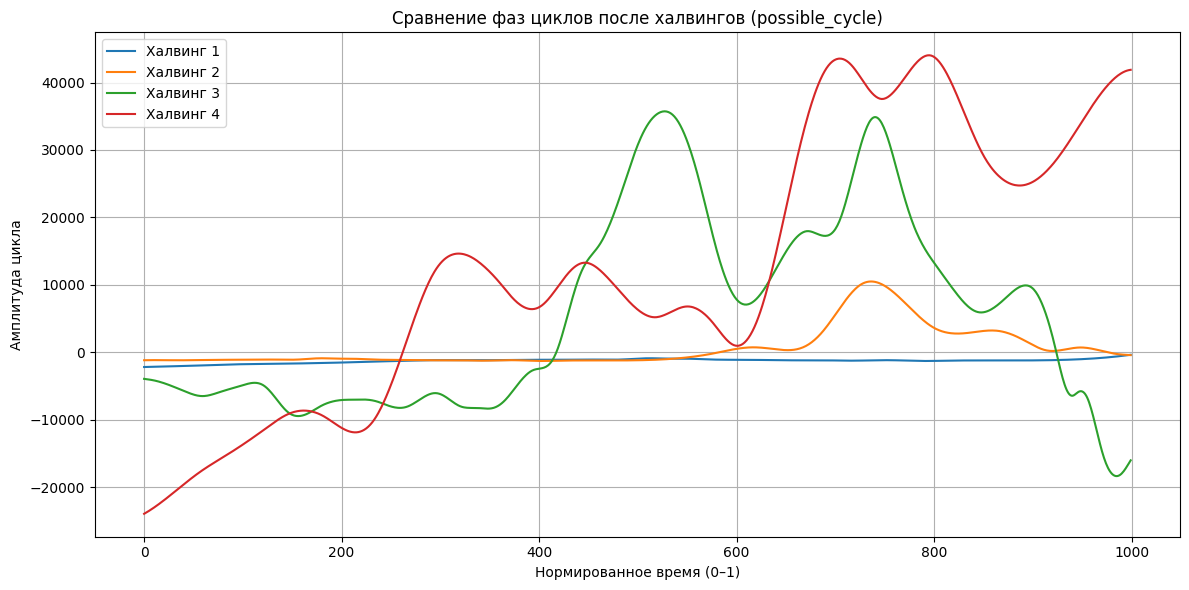

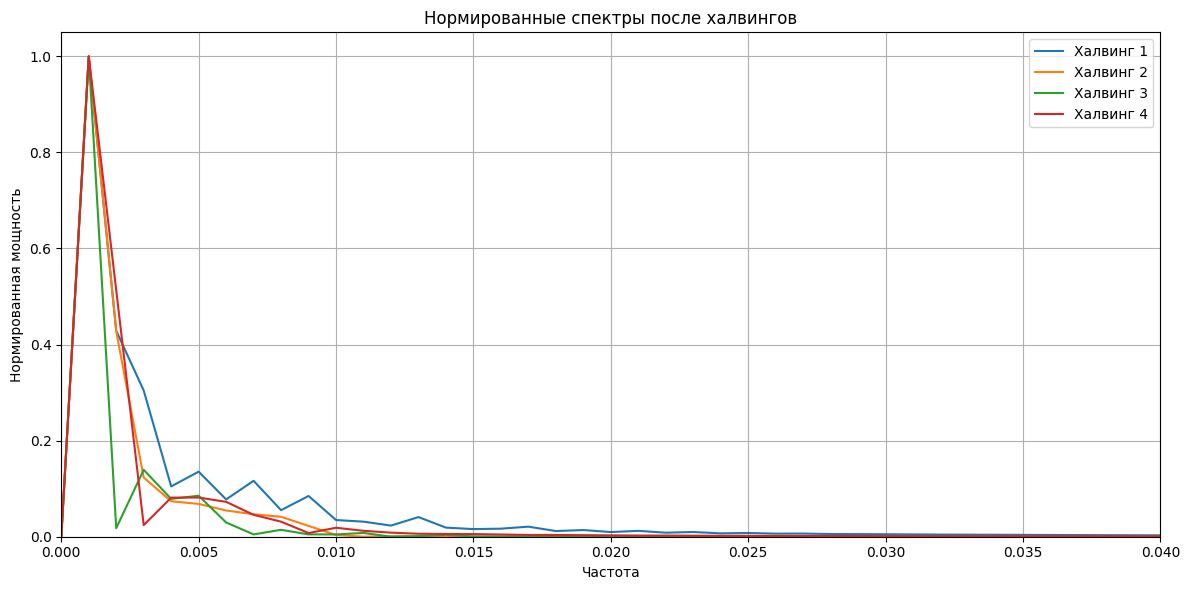

In [79]:
# –î–∞—Ç—ã —Ö–∞–ª–≤–∏–Ω–≥–æ–≤
halving_dates = [
    datetime.datetime(2012, 11, 28),
    datetime.datetime(2016, 7, 9),
    datetime.datetime(2020, 5, 11),
    datetime.datetime(2024, 4, 20),
]

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—Ä–µ–∑–∫–∏
window_before = 200
window_after = 800
target_len = 1000  # –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–∞—è –¥–ª–∏–Ω–∞

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ full_data['–î–∞—Ç–∞'] –≤ datetime
full_data['–î–∞—Ç–∞'] = pd.to_datetime(full_data['–î–∞—Ç–∞'])

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫
segments = []

# –í—ã—Ä–µ–∑–∞–µ–º —Å–µ–≥–º–µ–Ω—Ç—ã
for hd in halving_dates:
    idx = full_data.index[full_data['–î–∞—Ç–∞'].sub(hd).abs().argmin()]
    start_idx = max(idx - window_before, 0)
    end_idx = min(idx + window_after, len(full_data) - 1)
    segment = possible_cycle[start_idx:end_idx]

    # –ü—Ä–∏–≤–æ–¥–∏–º –∫ –æ–¥–Ω–æ–π –¥–ª–∏–Ω–µ
    interp = interp1d(np.linspace(0, 1, len(segment)), segment)
    resampled = interp(np.linspace(0, 1, target_len))
    segments.append(resampled)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏
plt.figure(figsize=(12, 6))
for i, s in enumerate(segments):
    plt.plot(s, label=f'–•–∞–ª–≤–∏–Ω–≥ {i+1}')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ñ–∞–∑ —Ü–∏–∫–ª–æ–≤ –ø–æ—Å–ª–µ —Ö–∞–ª–≤–∏–Ω–≥–æ–≤ (possible_cycle)')
plt.xlabel('–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –≤—Ä–µ–º—è (0‚Äì1)')
plt.ylabel('–ê–º–ø–ª–∏—Ç—É–¥–∞ —Ü–∏–∫–ª–∞')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# –ü–æ—Å—Ç—Ä–æ–∏–º —Å–ø–µ–∫—Ç—Ä—ã

spectra = []
plt.figure(figsize=(12, 6))

for i, segment in enumerate(segments):
    freqs, power = periodogram(segment)
    power_norm = power / np.max(power)  # –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞
    spectra.append((freqs, power_norm))

    plt.plot(freqs, power_norm, label=f'–•–∞–ª–≤–∏–Ω–≥ {i+1}')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title('–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–ø–µ–∫—Ç—Ä—ã –ø–æ—Å–ª–µ —Ö–∞–ª–≤–∏–Ω–≥–æ–≤')
plt.xlabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.ylabel('–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å')
plt.xlim(0, 0.04)   # –º–∞–∫—Å–∏–º—É–º —á–∞—Å—Ç–æ—Ç–∞ = 0.4 (–ø–µ—Ä–∏–æ–¥ ~2.5 –¥–Ω–µ–π)
plt.ylim(0, 1.05)  # –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


–†–µ–∑–∫–∏–π –ø–∏–∫ —É –Ω—É–ª–µ–≤–æ–π/–Ω–∏–∑–∫–æ–π —á–∞—Å—Ç–æ—Ç—ã –≥–æ–≤–æ—Ä–∏—Ç –æ –º–µ–¥–ª–µ–Ω–Ω–æ –º–µ–Ω—è—é—â–µ–º—Å—è —Ç—Ä–µ–Ω–¥–µ –∏–ª–∏ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–º —Ü–∏–∫–ª–µ.
- –ï—Å–ª–∏ —Å—Ä–∞–∑—É –ø–æ—Å–ª–µ –ø–∏–∫–∞ –º–æ—â–Ω–æ—Å—Ç—å —Ä–µ–∑–∫–æ –ø–∞–¥–∞–µ—Ç ‚Äî —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ:
- –¶–∏–∫–ª –æ—á–µ–Ω—å –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã–π (–≤—ã—Å–æ–∫–∞—è –∞–º–ø–ª–∏—Ç—É–¥–∞),
- –∏ —É–∑–∫–æ —á–∞—Å—Ç–æ—Ç–Ω—ã–π (–¥–ª–∏—Ç—Å—è –¥–æ–ª–≥–æ –∏ —Å—Ç–∞–±–∏–ª—å–Ω–æ),
- –æ–¥–∏–Ω –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–∏–π –≤–∫–ª–∞–¥.–ß—Ç–æ —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ–º –ø–æ —Ö–∞–ª–≤–∏–Ω–≥–∞–º –≤ –ø—Ä–∏—Ü–∏–ø–µ

## –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—á–∏—Å—Ç–∏—Ç—å —Å–µ–≥–º–µ–Ω—Ç—ã —É–±—Ä–∞–≤ "–∏–Ω–¥–∏–≤–∏–¥—É–ª–∞—å–Ω–æ—Å—Ç—å"(–æ–≥—Ä—É–±–∏—Ç—å) —á—Ä–µ–∑ –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—é

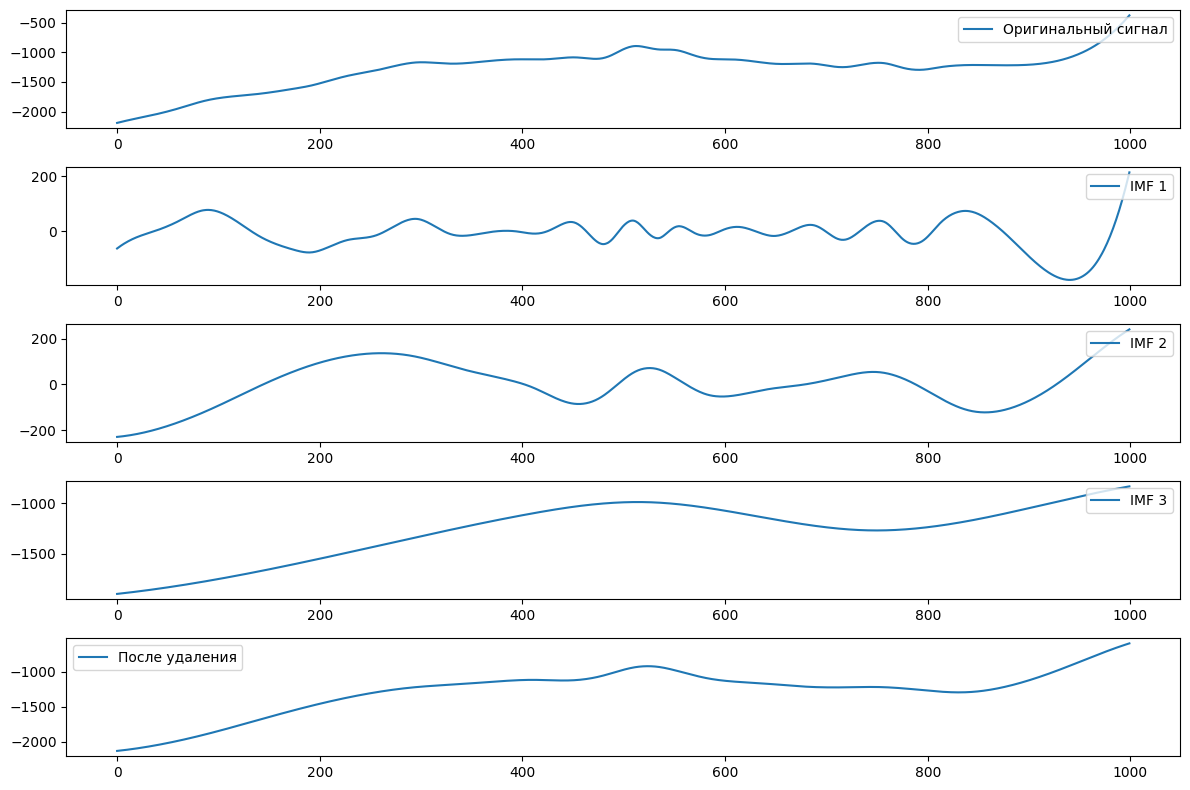

In [90]:
emd1 = EMD()
imfs1 = emd1(segments[0]) 

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 2 * (len(imfs1) + 1)))

plt.subplot(len(imfs1) + 2, 1, 1)
plt.plot(segments[0], label='–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª')
plt.legend(loc='upper right')

for i, imf in enumerate(imfs1):
    plt.subplot(len(imfs1) + 2, 1, i + 2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend(loc='upper right')

denoised_segments = np.sum(imfs1[1:], axis=0)

plt.subplot(len(imfs1)+2, 1, len(imfs1)+2)
plt.plot(denoised_segments, label=f'–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è')
plt.legend()
plt.tight_layout()
plt.show()

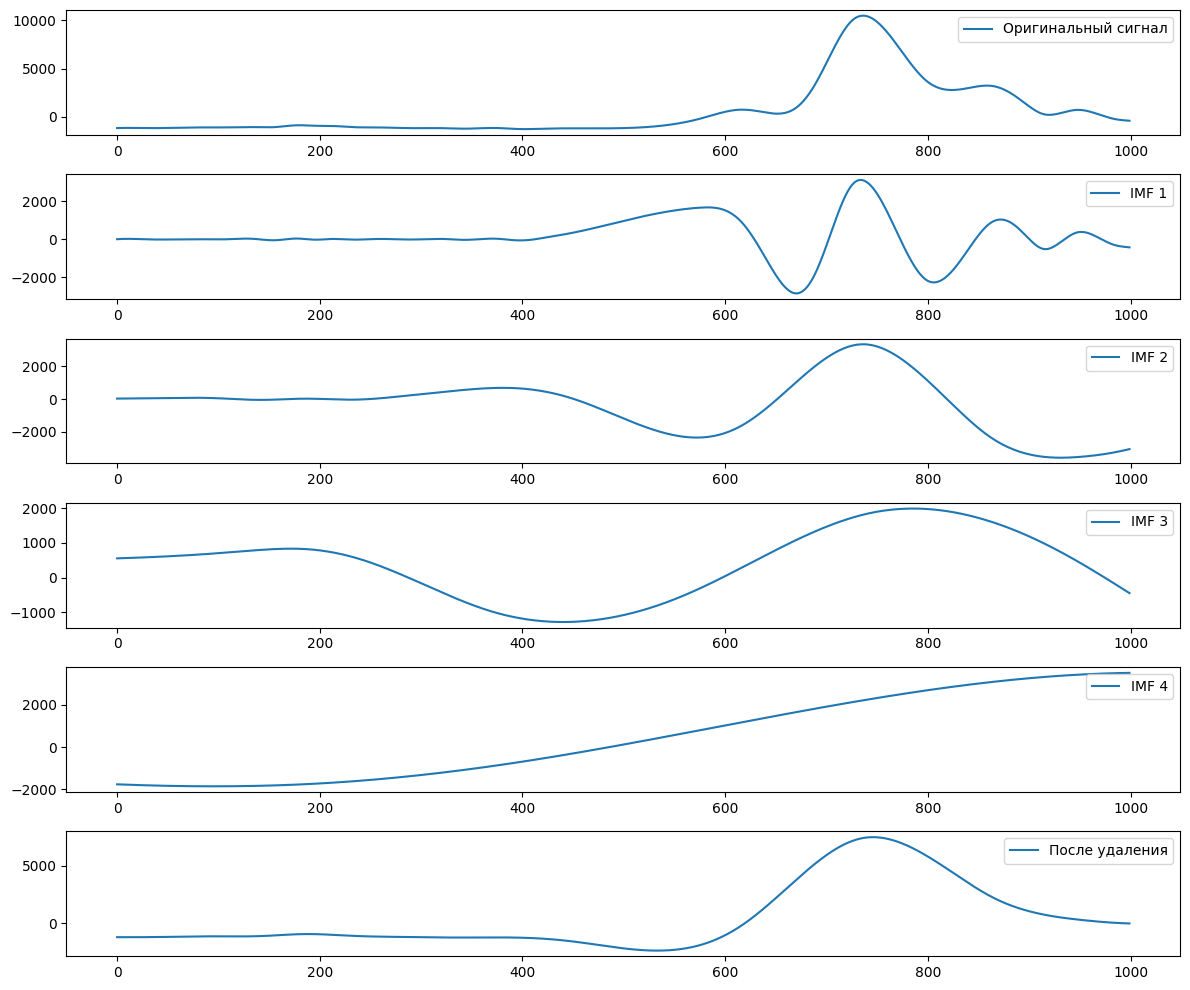

In [93]:
emd2 = EMD()
imfs2 = emd2(segments[1]) 

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 2 * (len(imfs2) + 1)))

plt.subplot(len(imfs2) + 2, 1, 1)
plt.plot(segments[1], label='–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª')
plt.legend(loc='upper right')

for i, imf in enumerate(imfs2):
    plt.subplot(len(imfs2) + 2, 1, i + 2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend(loc='upper right')

denoised_segments2 = np.sum(imfs2[1:], axis=0)

plt.subplot(len(imfs2)+2, 1, len(imfs2)+2)
plt.plot(denoised_segments2, label=f'–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è')
plt.legend()
plt.tight_layout()
plt.show()

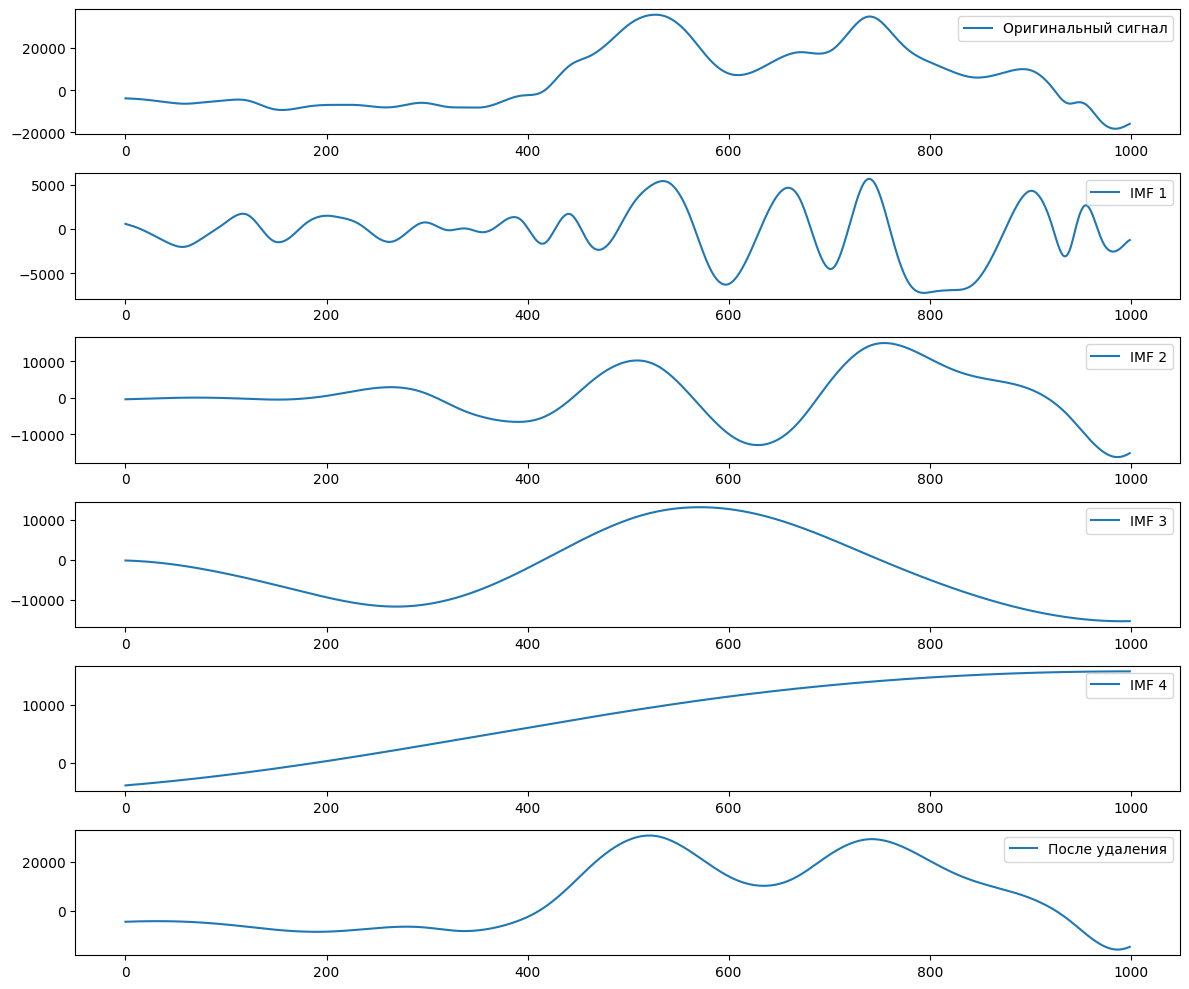

In [99]:
emd3 = EMD()
imfs3 = emd3(segments[2]) 

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 2 * (len(imfs3) + 1)))

plt.subplot(len(imfs3) + 2, 1, 1)
plt.plot(segments[2], label='–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª')
plt.legend(loc='upper right')

for i, imf in enumerate(imfs3):
    plt.subplot(len(imfs3) + 2, 1, i + 2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend(loc='upper right')

denoised_segments3 =np.sum(imfs3[1:], axis=0)

plt.subplot(len(imfs3)+2, 1, len(imfs3)+2)
plt.plot(denoised_segments3, label=f'–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è')
plt.legend()
plt.tight_layout()
plt.show()

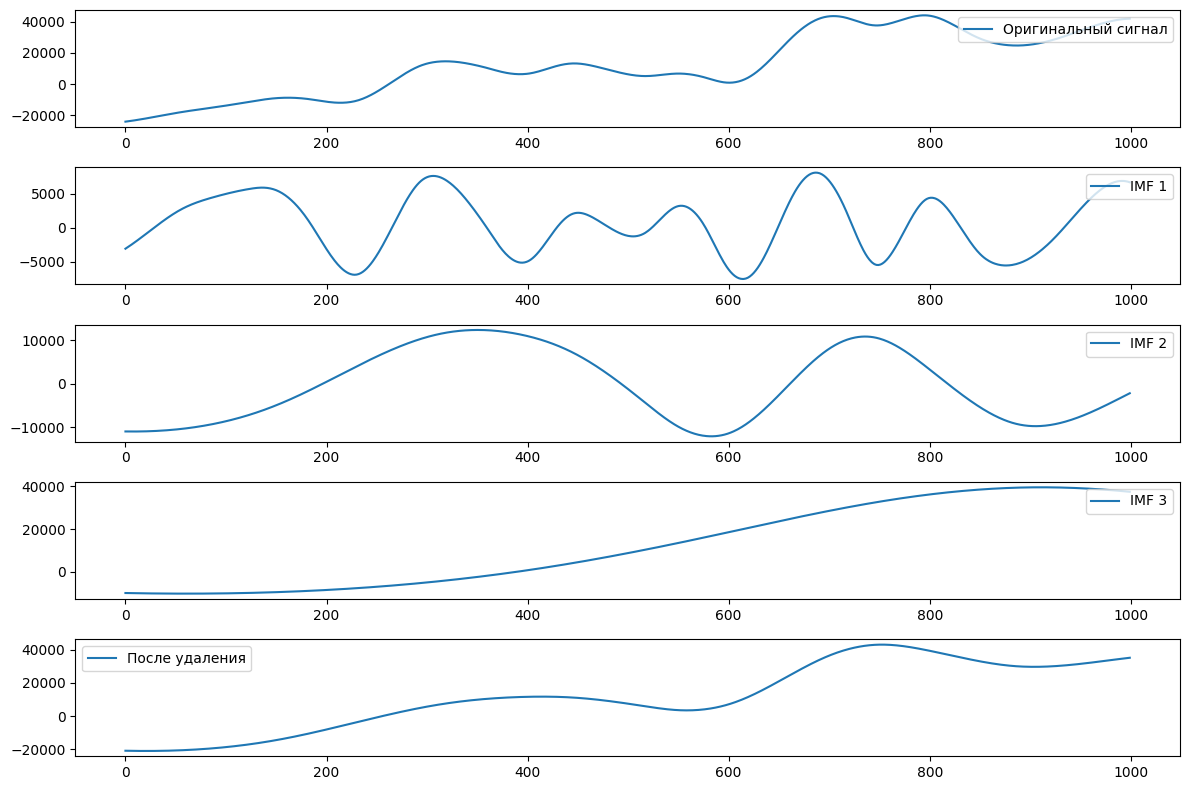

In [100]:
emd4 = EMD()
imfs4 = emd4(segments[3]) 

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 2 * (len(imfs4) + 1)))

plt.subplot(len(imfs4) + 2, 1, 1)
plt.plot(segments[3], label='–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª')
plt.legend(loc='upper right')

for i, imf in enumerate(imfs4):
    plt.subplot(len(imfs4) + 2, 1, i + 2)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend(loc='upper right')

denoised_segments4 =np.sum(imfs4[1:], axis=0)

plt.subplot(len(imfs4)+2, 1, len(imfs4)+2)
plt.plot(denoised_segments4, label=f'–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è')
plt.legend()
plt.tight_layout()
plt.show()

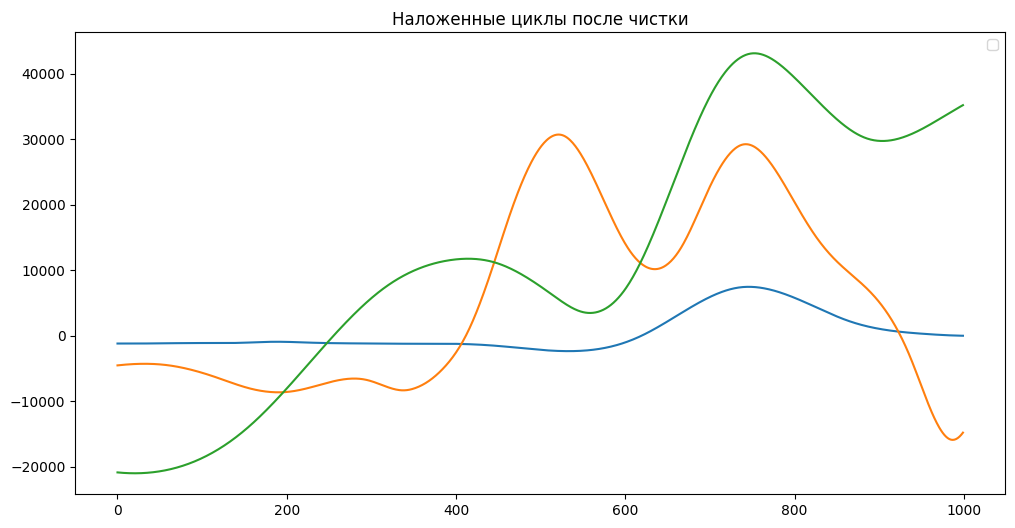

In [117]:
plt.figure(figsize=(12, 6))
for seg in [denoised_segments2, denoised_segments3, denoised_segments4]:
    plt.plot(seg)
plt.legend()
plt.title('–ù–∞–ª–æ–∂–µ–Ω–Ω—ã–µ —Ü–∏–∫–ª—ã –ø–æ—Å–ª–µ —á–∏—Å—Ç–∫–∏')
plt.savefig("–ü–æ—Å–ª–µ —á–∏—Å—Ç–∫–∏.png", dpi=300)
plt.show()


In [115]:
peaks_positions = []
peaks_heights = []

for seg in [denoised_segments2, denoised_segments3, denoised_segments4]:
    peaks, properties = find_peaks(seg, height=0)  # height –º–æ–∂–Ω–æ –ø–æ–¥–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å
    peaks_positions.append(peaks)
    peaks_heights.append(properties['peak_heights'])

# –í—ã–≤–µ–¥–µ–º –ø–æ–∑–∏—Ü–∏–∏ –ø–∏–∫–æ–≤ –∏ –≤—ã—Å–æ—Ç—ã
for i, (pos, h) in enumerate(zip(peaks_positions, peaks_heights)):
    print(f"–°–µ–≥–º–µ–Ω—Ç {i+1}: –ü–∏–∫–∏ –≤ –ø–æ–∑–∏—Ü–∏—è—Ö {pos}, –≤—ã—Å–æ—Ç—ã {h}")

# –ü–æ—Å—á–∏—Ç–∞–µ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞
intervals = [np.diff(pos) for pos in peaks_positions]

for i, inter in enumerate(intervals):
    print(f"–°–µ–≥–º–µ–Ω—Ç {i+1}: –°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏ = {np.mean(inter):.2f} —Ç–æ—á–µ–∫")

# –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ ‚Äî –º–æ–∂–Ω–æ –≤—ã—á–∏—Å–ª–∏—Ç—å —Å—Ä–µ–¥–Ω—é—é –ø–æ–∑–∏—Ü–∏—é –ø–∏–∫–æ–≤ –∫–∞–∂–¥–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞
mean_peak_pos = [np.mean(pos) for pos in peaks_positions]
print(f"–°—Ä–µ–¥–Ω–∏–µ –ø–æ–∑–∏—Ü–∏–∏ –ø–∏–∫–æ–≤: {mean_peak_pos}")

–°–µ–≥–º–µ–Ω—Ç 1: –ü–∏–∫–∏ –≤ –ø–æ–∑–∏—Ü–∏—è—Ö [746], –≤—ã—Å–æ—Ç—ã [7466.98480323]
–°–µ–≥–º–µ–Ω—Ç 2: –ü–∏–∫–∏ –≤ –ø–æ–∑–∏—Ü–∏—è—Ö [521 742], –≤—ã—Å–æ—Ç—ã [30712.6528779  29240.57857081]
–°–µ–≥–º–µ–Ω—Ç 3: –ü–∏–∫–∏ –≤ –ø–æ–∑–∏—Ü–∏—è—Ö [414 752], –≤—ã—Å–æ—Ç—ã [11755.98593766 43121.3688721 ]
–°–µ–≥–º–µ–Ω—Ç 1: –°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏ = nan —Ç–æ—á–µ–∫
–°–µ–≥–º–µ–Ω—Ç 2: –°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏ = 221.00 —Ç–æ—á–µ–∫
–°–µ–≥–º–µ–Ω—Ç 3: –°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏ = 338.00 —Ç–æ—á–µ–∫
–°—Ä–µ–¥–Ω–∏–µ –ø–æ–∑–∏—Ü–∏–∏ –ø–∏–∫–æ–≤: [746.0, 631.5, 583.0]


### –í—ã–≤–æ–¥: –ò—Ç–æ–≥–æ–≤–æ–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –ø–æ —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç–∏:**
**–ü–µ—Ä–≤—ã–π –∑–∞–º–µ—Ç–Ω—ã–π –ø–∏–∫ (~420‚Äì500 –¥–Ω–µ–π –ø–æ—Å–ª–µ —Ö–∞–ª–≤–∏–Ω–≥–∞) ‚Äî —ç—Ç–æ, –≤–µ—Ä–æ—è—Ç–Ω–æ, –ø–µ—Ä–≤—ã–π –∫—Ä—É–ø–Ω—ã–π —Ü–∏–∫–ª –∏–ª–∏ —Ñ–∞–∑–æ–≤—ã–π —Å–¥–≤–∏–≥ –≤ –ø–æ–≤–µ–¥–µ–Ω–∏–∏ —Ä—ã–Ω–∫–∞ –ø–æ—Å–ª–µ —Ö–∞–ª–≤–∏–Ω–≥–∞.**
**–í—Ç–æ—Ä–æ–π –∫—Ä—É–ø–Ω—ã–π –ø–∏–∫ (~746 –¥–Ω–µ–π –ø–æ—Å–ª–µ —Ö–∞–ª–≤–∏–Ω–≥–∞) ‚Äî —Å–ª–µ–¥—É—é—â–∏–π –∑–Ω–∞—á–∏–º—ã–π —Ü–∏–∫–ª –∏–ª–∏ —Å–º–µ–Ω–∞ —Ñ–∞–∑—ã.**

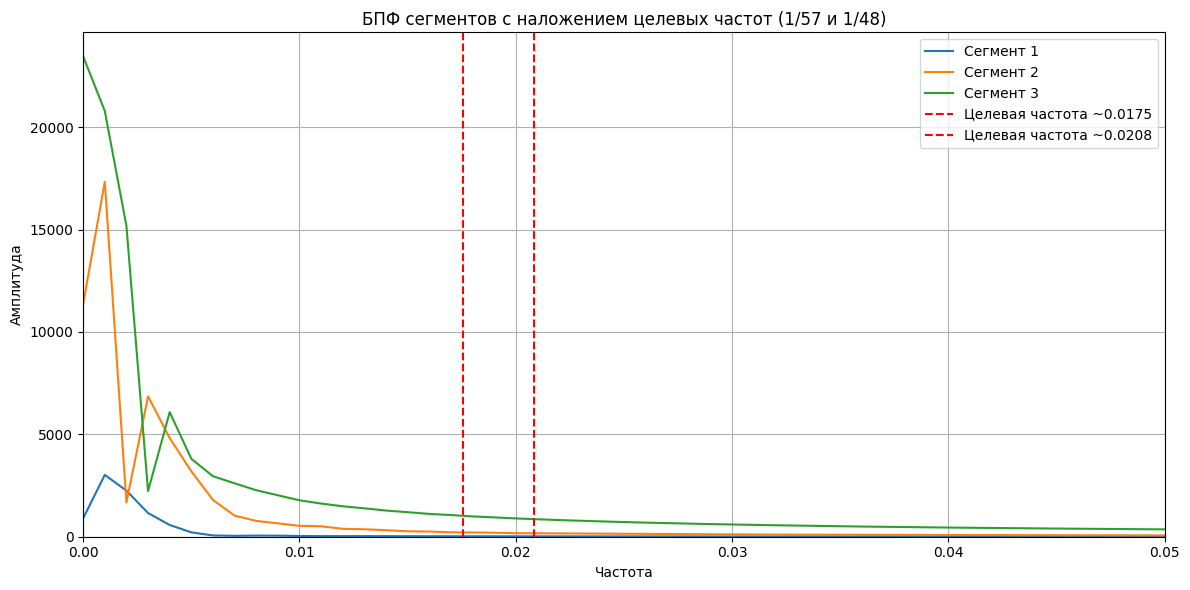

In [120]:
denoised_segments = [denoised_segments2, denoised_segments3, denoised_segments4]

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
n_segments = len(denoised_segments)
N = len(denoised_segments[0])  # –î–ª–∏–Ω–∞ —Å–∏–≥–Ω–∞–ª–∞
T = 1.0  # –®–∞–≥ –≤—Ä–µ–º–µ–Ω–∏ (–æ–¥–Ω–∞ —Ç–æ—á–∫–∞ ‚Äî –æ–¥–∏–Ω –¥–µ–Ω—å)

target_freqs = [1/57, 1/48]

plt.figure(figsize=(12, 6))

for i, segment in enumerate(denoised_segments):
    yf = fft(segment)
    xf = fftfreq(N, T)[:N // 2]  # –¢–æ–ª—å–∫–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ —á–∞—Å—Ç–æ—Ç—ã

    plt.plot(xf, 2.0/N * np.abs(yf[:N // 2]), label=f'–°–µ–≥–º–µ–Ω—Ç {i+1}')

# –í–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ –¥–ª—è —Ü–µ–ª–µ–≤—ã—Ö —á–∞—Å—Ç–æ—Ç
for freq in target_freqs:
    plt.axvline(x=freq, color='r', linestyle='--', label=f'–¶–µ–ª–µ–≤–∞—è —á–∞—Å—Ç–æ—Ç–∞ ~{freq:.4f}')

plt.xlim(0, 0.05)  # –¢–æ–ª—å–∫–æ –Ω–∏–∑–∫–∏–µ —á–∞—Å—Ç–æ—Ç—ã
plt.ylim(0, None)
plt.title('–ë–ü–§ —Å–µ–≥–º–µ–Ω—Ç–æ–≤ —Å –Ω–∞–ª–æ–∂–µ–Ω–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —á–∞—Å—Ç–æ—Ç (1/57 –∏ 1/48)')
plt.xlabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.ylabel('–ê–º–ø–ª–∏—Ç—É–¥–∞')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### –í—ã–≤–æ–¥: –ù–∞–π–¥–µ–Ω–Ω—ã–µ –Ω–∞–º–∏ —á–∞—Å—Ç–æ—Ç—ã —á—Ä–µ–µ–∑ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –Ω–∏–∫–∞–∫–æ–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ö–∞–ª–≤–∏–Ω–≥–∞–º–∏ –æ—á–µ–≤–¥–∏–Ω–æ –Ω–µ –∏–º–µ—é—Ç


## –ü–æ–ø—Ä–æ–±—É–µ–º –≤—ã–¥–µ–ª–∏—Ç—å –ø–∏–∫–∏ –Ω–∞ —Å–∏–≥–Ω–∞–ª–µ –≤–æ—Å—Å—Ç–∞–≤–Ω–æ–ª–µ–Ω–Ω–æ–º –ø–æ—Å–ª–µ –≤–µ–π–ª–≤–µ—Ç. –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å –∏—Ö —Å –Ω–∞—à–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –ø–æ —Ö–∞–ª–≤–∏–Ω–≥–∞–º.

–¢–æ–ø-5 –ø–∏–∫–æ–≤ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–≥–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞:
–ü–∏–∫ 1: –ø–æ–∑–∏—Ü–∏—è = 2364, –≤—ã—Å–æ—Ç–∞ = 2889.73
–ü–∏–∫ 2: –ø–æ–∑–∏—Ü–∏—è = 2588, –≤—ã—Å–æ—Ç–∞ = 3544.47
–ü–∏–∫ 3: –ø–æ–∑–∏—Ü–∏—è = 3227, –≤—ã—Å–æ—Ç–∞ = 3232.71
–ü–∏–∫ 4: –ø–æ–∑–∏—Ü–∏—è = 3451, –≤—ã—Å–æ—Ç–∞ = 2423.87
–ü–∏–∫ 5: –ø–æ–∑–∏—Ü–∏—è = 3462, –≤—ã—Å–æ—Ç–∞ = 2913.07

–ò–Ω—Ç–µ—Ä–≤–∞–ª—ã –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏: [224 639 224  11]
–°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: 274.50 –¥–Ω–µ–π


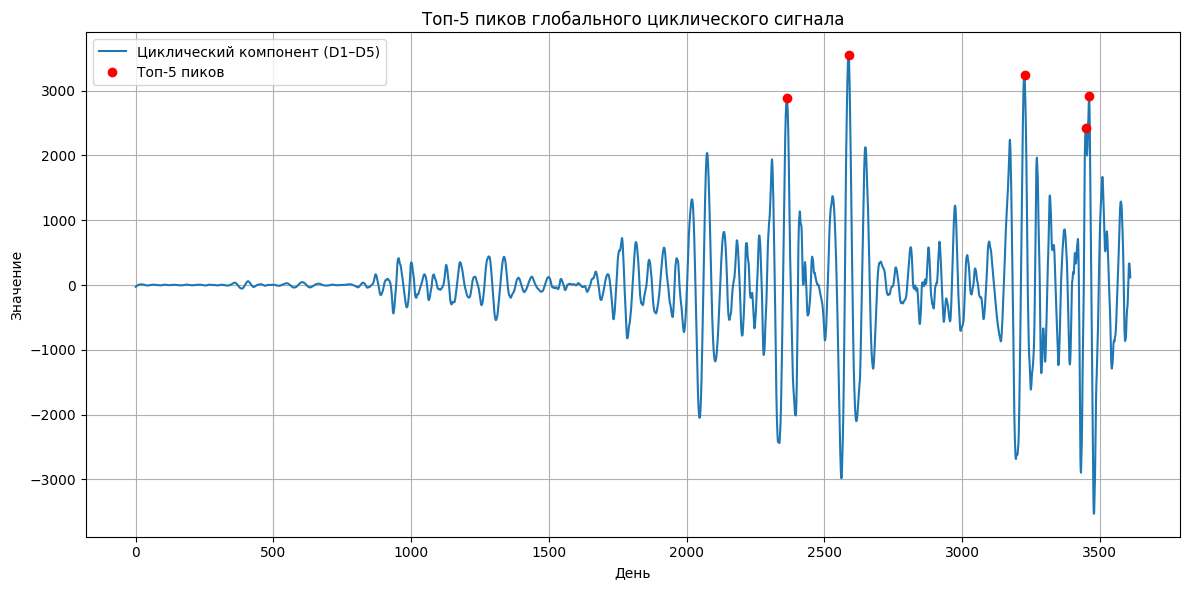

In [121]:
# –ù–∞—Ö–æ–¥–∏–º –ø–∏–∫–∏
peaks, properties = find_peaks(cycle_component, height=0)  # –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å threshold

# –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –≤—ã—Å–æ—Ç–µ –∏ –≤—ã–±–µ—Ä–µ–º —Ç–æ–ø-5
top_indices = np.argsort(properties['peak_heights'])[-5:]
top_peaks = peaks[top_indices]
top_heights = properties['peak_heights'][top_indices]

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ –ø–æ–∑–∏—Ü–∏–∏ (–ø–æ –≤—Ä–µ–º–µ–Ω–∏)
sorted_order = np.argsort(top_peaks)
top_peaks = top_peaks[sorted_order]
top_heights = top_heights[sorted_order]

# –†–∞—Å–ø–µ—á–∞—Ç–∞–µ–º
print("–¢–æ–ø-5 –ø–∏–∫–æ–≤ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–≥–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞:")
for i, (pos, height) in enumerate(zip(top_peaks, top_heights), 1):
    print(f"–ü–∏–∫ {i}: –ø–æ–∑–∏—Ü–∏—è = {pos}, –≤—ã—Å–æ—Ç–∞ = {height:.2f}")

# –ò–Ω—Ç–µ—Ä–≤–∞–ª—ã –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏
intervals = np.diff(top_peaks)
print(f"\n–ò–Ω—Ç–µ—Ä–≤–∞–ª—ã –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏: {intervals}")
print(f"–°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: {np.mean(intervals):.2f} –¥–Ω–µ–π")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 6))
plt.plot(cycle_component, label='–¶–∏–∫–ª–∏—á–µ—Å–∫–∏–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç (D1‚ÄìD5)')
plt.plot(top_peaks, cycle_component[top_peaks], 'ro', label='–¢–æ–ø-5 –ø–∏–∫–æ–≤')
plt.title('–¢–æ–ø-5 –ø–∏–∫–æ–≤ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞')
plt.xlabel('–î–µ–Ω—å')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

üëâ –ò–Ω—Ç–µ—Ä–≤–∞–ª—ã –º–µ–∂–¥—É –ø–∏–∫–∞–º–∏ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –±–ª–∏–∑–∫–∏ –∫ —Ç–µ–º, —á—Ç–æ –º—ã –Ω–∞–±–ª—é–¥–∞–ª–∏ –≤–Ω—É—Ç—Ä–∏ —Å–µ–≥–º–µ–Ω—Ç–æ–≤ –ø–æ—Å–ª–µ —Ö–∞–ª–≤–∏–Ω–≥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –∑–Ω–∞—á–µ–Ω–∏—è 224 –∏ 639, –∫–æ—Ç–æ—Ä—ã–µ:
224 –¥–Ω–µ–π ‚Äî –ø–æ—á—Ç–∏ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –ø–∏–∫–æ–º –º–µ–∂–¥—É –¥–≤—É–º—è —Ü–∏–∫–ª–∞–º–∏ –≤ —Å–µ–≥–º–µ–Ω—Ç–µ 2 (521 ‚Üí 742),
639 ‚Äî –ø–æ—Ö–æ–∂–µ –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª –º–µ–∂–¥—É –¥–≤—É–º—è –∫—Ä—É–ø–Ω—ã–º–∏ –ø–∏–∫–∞–º–∏ –≤ —Å–µ–≥–º–µ–Ω—Ç–µ 3 (414 ‚Üí 752 = 338, –Ω–æ –≤ –º–∞—Å—à—Ç–∞–±–µ –æ–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç).
–ê –≤–æ—Ç 11 –¥–Ω–µ–π (–º–µ–∂–¥—É 3451 –∏ 3462) ‚Äî —ç—Ç–æ —Å–∫–æ—Ä–µ–µ –ª–æ–∂–Ω—ã–π –¥—É–±–ª—å, –≤—ã–∑–≤–∞–Ω–Ω—ã–π —Ç–µ–º, —á—Ç–æ —Ç–∞–º –¥–≤–∞ —Å–æ—Å–µ–¥–Ω–∏—Ö –ø–∏–∫–∞ –ø–æ—á—Ç–∏ –Ω–∞ –æ–¥–Ω–æ–º —É—Ä–æ–≤–Ω–µ. 

### –í—ã–≤–æ–¥: –¶–∏–∫–ª—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–æ—è–≤–ª—è—é—Ç—Å—è –≥–ª–æ–±–∞–ª—å–Ω–æ, —Ç.–µ –Ω–∞—Ä–∑–µ–∫–∞ –Ω–∞ —Ö–∞–ª–≤–∏–Ω–≥–∏ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–Ω–∞
–¶–∏—Ñ—Ä—ã 224 –∏ 639 –≤ –≥–ª–æ–±–∞–ª—å–Ω–æ–º —Å–∏–≥–Ω–∞–ª–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç 221 –∏ 338 –≤ –ª–æ–∫–∞–ª—å–Ω—ã—Ö —Å–µ–≥–º–µ–Ω—Ç–∞—Ö ‚Äî —ç—Ç–æ —Å–∏–ª—å–Ω–æ —É—Å–∏–ª–∏–≤–∞–µ—Ç –∞—Ä–≥—É–º–µ–Ω—Ç –æ –Ω–∞–ª–∏—á–∏–∏ —Ä–µ–∞–ª—å–Ω–æ–π, —É—Å—Ç–æ–π—á–∏–≤–æ–π —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç–∏.
–°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –≤ 274 –¥–Ω—è ‚Äî —ç—Ç–æ —Ä–∞–∑—É–º–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –¥–≤—É—Ö ¬´—Ü–∏–∫–ª–æ–≤¬ª:
–ø–µ—Ä–≤—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª ‚âà 220‚Äì230 –¥–Ω–µ–π (–ª–æ–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è),
–≤—Ç–æ—Ä–æ–π –∏–Ω—Ç–µ—Ä–≤–∞–ª ‚âà 330‚Äì340 –∏–ª–∏ 640 –¥–Ω–µ–π (–≥–ª–æ–±–∞–ª—å–Ω—ã–π —Ç—Ä–µ–Ω–¥).